# Paris Hedonic Real Estate Study - Part II

<h2>2.4 Exploration and data analysis</h2>

In [ ]:
# Load complete dataset

paris_data = pd.read_csv('paris_data.csv')

In [4]:
# Load the needed geodata to implement maps

paris_geodata = r'arrondissements.geojson'

<h3>2.4.1. Real estate prices by borough</h3>

In [7]:
paris_map = folium.Map(location=[48.8566101, 2.3514992], zoom_start=12, max_zoom=12, min_zoom=12, tiles='Mapbox Bright', width=850, height=600)

threshold_scale = np.linspace(paris_data['Avg RE Prices'].min(), paris_data['Avg RE Prices'].max(), 6, dtype=int)
threshold_scale = threshold_scale.tolist()  
threshold_scale[-1] = threshold_scale[-1] + 1  

paris_map.choropleth(
    geo_data=paris_geodata,
    data=paris_data,
    columns=['l_aroff','Avg RE Prices'],
    key_on='feature.properties.l_aroff',
    fill_color='BuPu', 
    fill_opacity=0.7, 
    line_opacity=0.5,
    threshold_scale = threshold_scale,
    legend_name='Paris average real estate prices by borough',
    reset=True)

for lat, lng, arr, borough, price in zip(paris_data.Latitude, paris_data.Longitude, paris_data['Arr'], paris_data['l_aroff'], paris_data['Avg RE Prices']):
    folium.features.Marker(
        [lat, lng],
        popup = folium.Popup(str(arr) + '. ' + str(borough) + ': ' + str(price) + ' euros/m2'),
        ).add_to(paris_map)    

paris_map.save('avg_real_estate_prices.html')

<h3>2.4.2. Population</h3>

In [140]:
pearson_coef, p_value = stats.pearsonr(paris_data['Avg RE Prices'], paris_data['Population'])
print("Correlation between population density per km2 and Paris average real estate prices: \nr =", pearson_coef.round(4), "with P =", p_value.round(4)) 
print('---')
spearman_coef, p_value = stats.spearmanr(paris_data['Avg RE Prices'], paris_data['Population'])
print("Correlation between population density per km2 and Paris average real estate prices: \nrho =", spearman_coef.round(4), "with P =", p_value.round(4)) 

Correlation between population density per km2 and Paris average real estate prices: 
r = -0.4732 with P = 0.0351
---
Correlation between population density per km2 and Paris average real estate prices: 
rho = -0.5083 with P = 0.0221


In [9]:
paris_map = folium.Map(location=[48.8566101, 2.3514992], zoom_start=12, max_zoom=12, min_zoom=12, tiles='Mapbox Bright', width=850, height=600)

threshold_scale = np.linspace(paris_data['Population'].min(), paris_data['Population'].max(), 6, dtype=int)
threshold_scale = threshold_scale.tolist()  
threshold_scale[-1] = threshold_scale[-1] + 1  

paris_map.choropleth(
    geo_data=paris_geodata,
    data=paris_data,
    columns=['l_aroff','Population'],
    key_on='feature.properties.l_aroff',
    fill_color='BuPu', 
    fill_opacity=0.7, 
    line_opacity=0.5,
    threshold_scale = threshold_scale,
    legend_name='Paris population density by borough',
    reset=True)

for lat, lng, arr, borough, price in zip(paris_data.Latitude, paris_data.Longitude, paris_data['Arr'], paris_data['l_aroff'], paris_data['Avg RE Prices']):
    folium.features.Marker(
        [lat, lng],
        popup = folium.Popup(str(arr) + '. ' + str(borough) + ': ' + str(price) + ' euros/m2'),
        ).add_to(paris_map)    

paris_map.save('population.html')

<h3>2.4.3 Service offering analysis</h3>

<h4>A. Map the service offering density by borough</h4>

In [70]:
paris_map = folium.Map(location=[48.8566101, 2.3514992], zoom_start=12, max_zoom=12, min_zoom=12, tiles='Mapbox Bright', width=850, height=600)

threshold_scale = np.linspace(paris_data['Services (all cat.)'].min(), paris_data['Services (all cat.)'].max(), 6, dtype=int)
threshold_scale = threshold_scale.tolist()  
threshold_scale[-1] = threshold_scale[-1] + 1  

paris_map.choropleth(
    geo_data=paris_geodata,
    data=paris_data,
    columns=['l_aroff','Services (all cat.)'],
    key_on='feature.properties.l_aroff',
    fill_color='BuPu', 
    fill_opacity=0.7, 
    line_opacity=0.5,
    threshold_scale = threshold_scale,
    legend_name='Paris service offering density by borough',
    reset=True)

for lat, lng, arr, borough, price in zip(paris_data.Latitude, paris_data.Longitude, paris_data['Arr'], paris_data['l_aroff'], paris_data['Avg RE Prices']):
    folium.features.Marker(
        [lat, lng],
        popup = folium.Popup(str(arr) + '. ' + str(borough) + ': ' + str(price) + ' euros/m2'),
        ).add_to(paris_map)   
    
paris_map.save('service_offering.html')

<h4>B. Explore correlations</h4>

In [3]:
paris_data.sort_values('Avg RE Prices', ascending=False, inplace=True)

### Pearson's r

In [27]:
pearson_coef, p_value = stats.pearsonr(paris_data['Avg RE Prices'], paris_data['Services (all cat.)'])
print("Pearson Correlation between service offering per km2 and Paris average real estate prices: \nR =", pearson_coef.round(4), "with P =", p_value.round(4)) 
print('---')
pearson_coef, p_value = stats.pearsonr(paris_data['Avg RE Prices'], paris_data['Undertakers'])
print("Pearson Correlation between death care services per km2 and Paris average real estate prices: \nR =", pearson_coef.round(4), "with P =", p_value.round(4)) 
print('---')
pearson_coef, p_value = stats.pearsonr(paris_data['Avg RE Prices'], paris_data['Courts'])
print("Pearson Correlation between courts per km2 and Paris average real estate prices: \nR =", pearson_coef.round(4), "with P =", p_value.round(4)) 
print('---')
pearson_coef, p_value = stats.pearsonr(paris_data['Avg RE Prices'], paris_data['Law enforcement agencies'])
print("Pearson Correlation between law enforcement offices per km2 and Paris average real estate prices: \nR =", pearson_coef.round(4), "with P =", p_value.round(4)) 
print('---')
pearson_coef, p_value = stats.pearsonr(paris_data['Avg RE Prices'], paris_data['Tax offices'])
print("Pearson Correlation between Tax offices per km2 and Paris average real estate prices: \nR =", pearson_coef.round(4), "with P =", p_value.round(4)) 
print('---')
pearson_coef, p_value = stats.pearsonr(paris_data['Avg RE Prices'], paris_data['Employment agencies'])
print("Pearson Correlation between Employment agencies per km2 and Paris average real estate prices: \nR =", pearson_coef.round(4), "with P =", p_value.round(4)) 
print('---')
pearson_coef, p_value = stats.pearsonr(paris_data['Avg RE Prices'], paris_data['Banks'])
print("Pearson Correlation between Banks per km2 and Paris average real estate prices: \nR =", pearson_coef.round(4), "with P =", p_value.round(4)) 
print('---')
pearson_coef, p_value = stats.pearsonr(paris_data['Avg RE Prices'], paris_data['Automotive services'])
print("Pearson Correlation between Automotive services per km2 and Paris average real estate prices: \nR =", pearson_coef.round(4), "with P =", p_value.round(4)) 
print('---')
pearson_coef, p_value = stats.pearsonr(paris_data['Avg RE Prices'], paris_data['Building crafts'])
print("Pearson Correlation between Building craft per km2 and Paris average real estate prices: \nR =", pearson_coef.round(4), "with P =", p_value.round(4)) 
print('---')
pearson_coef, p_value = stats.pearsonr(paris_data['Avg RE Prices'], paris_data['Personal care services'])
print("Pearson Correlation between Personal care services per km2 and Paris average real estate prices: \nR =", pearson_coef.round(4), "with P =", p_value.round(4)) 
print('---')
pearson_coef, p_value = stats.pearsonr(paris_data['Avg RE Prices'], paris_data['Estate agencies'])
print("Pearson Correlation between Estate agencies per km2 and Paris average real estate prices: \nR =", pearson_coef.round(4), "with P =", p_value.round(4)) 
print('---')
pearson_coef, p_value = stats.pearsonr(paris_data['Avg RE Prices'], paris_data['Restaurants'])
print("Pearson Correlation between Restaurants per km2 and Paris average real estate prices: \nR =", pearson_coef.round(4), "with P =", p_value.round(4)) 
print('---')
pearson_coef, p_value = stats.pearsonr(paris_data['Avg RE Prices'], paris_data['Post offices'])
print("Pearson Correlation between Post offices per km2 and Paris average real estate prices: \nR =", pearson_coef.round(4), "with P =", p_value.round(4)) 
print('---')
pearson_coef, p_value = stats.pearsonr(paris_data['Avg RE Prices'], paris_data['Veterinaries'])
print("Pearson Correlation between Veterinaries per km2 and Paris average real estate prices: \nR =", pearson_coef.round(4), "with P =", p_value.round(4)) 
print('---')
pearson_coef, p_value = stats.pearsonr(paris_data['Avg RE Prices'], paris_data['Laundries'])
print("Pearson Correlation between Laundries per km2 and Paris average real estate prices: \nR =", pearson_coef.round(4), "with P =", p_value.round(4)) 

Pearson Correlation between service offering per km2 and Paris average real estate prices: 
R = 0.0544 with P = 0.8198
---
Pearson Correlation between death care services per km2 and Paris average real estate prices: 
R = -0.5996 with P = 0.0052
---
Pearson Correlation between courts per km2 and Paris average real estate prices: 
R = 0.589 with P = 0.0063
---
Pearson Correlation between law enforcement offices per km2 and Paris average real estate prices: 
R = 0.57 with P = 0.0087
---
Pearson Correlation between Tax offices per km2 and Paris average real estate prices: 
R = 0.015 with P = 0.95
---
Pearson Correlation between Employment agencies per km2 and Paris average real estate prices: 
R = -0.083 with P = 0.7278
---
Pearson Correlation between Banks per km2 and Paris average real estate prices: 
R = 0.2862 with P = 0.2213
---
Pearson Correlation between Automotive services per km2 and Paris average real estate prices: 
R = -0.0392 with P = 0.8696
---
Pearson Correlation between Bu

### Spearman's rho

In [28]:
spearman_coef, p_value = stats.spearmanr(paris_data['Avg RE Prices'], paris_data['Services (all cat.)'])
print("Spearman Correlation between service offering per km2 and Paris average real estate prices: \nR =", spearman_coef.round(4), "with P =", p_value.round(4)) 
print('---')
spearman_coef, p_value = stats.spearmanr(paris_data['Avg RE Prices'], paris_data['Undertakers'])
print("Spearman Correlation between death care services per km2 and Paris average real estate prices: \nR =", spearman_coef.round(4), "with P =", p_value.round(4)) 
print('---')
spearman_coef, p_value = stats.spearmanr(paris_data['Avg RE Prices'], paris_data['Courts'])
print("Spearman Correlation between courts per km2 and Paris average real estate prices: \nR =", spearman_coef.round(4), "with P =", p_value.round(4)) 
print('---')
spearman_coef, p_value = stats.spearmanr(paris_data['Avg RE Prices'], paris_data['Law enforcement agencies'])
print("Spearman Correlation between law enforcement offices per km2 and Paris average real estate prices: \nR =", spearman_coef.round(4), "with P =", p_value.round(4)) 
print('---')
spearman_coef, p_value = stats.spearmanr(paris_data['Avg RE Prices'], paris_data['Tax offices'])
print("Spearman Correlation between Tax offices per km2 and Paris average real estate prices: \nR =", spearman_coef.round(4), "with P =", p_value.round(4)) 
print('---')
spearman_coef, p_value = stats.spearmanr(paris_data['Avg RE Prices'], paris_data['Employment agencies'])
print("Spearman Correlation between Employment agencies per km2 and Paris average real estate prices: \nR =", spearman_coef.round(4), "with P =", p_value.round(4)) 
print('---')
spearman_coef, p_value = stats.spearmanr(paris_data['Avg RE Prices'], paris_data['Banks'])
print("Spearman Correlation between Banks per km2 and Paris average real estate prices: \nR =", spearman_coef.round(4), "with P =", p_value.round(4)) 
print('---')
spearman_coef, p_value = stats.spearmanr(paris_data['Avg RE Prices'], paris_data['Automotive services'])
print("Spearman Correlation between Automotive services per km2 and Paris average real estate prices: \nR =", spearman_coef.round(4), "with P =", p_value.round(4)) 
print('---')
spearman_coef, p_value = stats.spearmanr(paris_data['Avg RE Prices'], paris_data['Building crafts'])
print("Spearman Correlation between Building craft per km2 and Paris average real estate prices: \nR =", spearman_coef.round(4), "with P =", p_value.round(4)) 
print('---')
spearman_coef, p_value = stats.spearmanr(paris_data['Avg RE Prices'], paris_data['Personal care services'])
print("Spearman Correlation between Personal care services per km2 and Paris average real estate prices: \nR =", spearman_coef.round(4), "with P =", p_value.round(4)) 
print('---')
spearman_coef, p_value = stats.spearmanr(paris_data['Avg RE Prices'], paris_data['Estate agencies'])
print("Spearman Correlation between Estate agencies per km2 and Paris average real estate prices: \nR =", spearman_coef.round(4), "with P =", p_value.round(4)) 
print('---')
spearman_coef, p_value = stats.spearmanr(paris_data['Avg RE Prices'], paris_data['Restaurants'])
print("Spearman Correlation between Restaurants per km2 and Paris average real estate prices: \nR =", spearman_coef.round(4), "with P =", p_value.round(4)) 
print('---')
spearman_coef, p_value = stats.spearmanr(paris_data['Avg RE Prices'], paris_data['Post offices'])
print("Spearman Correlation between Post offices per km2 and Paris average real estate prices: \nR =", spearman_coef.round(4), "with P =", p_value.round(4)) 
print('---')
spearman_coef, p_value = stats.spearmanr(paris_data['Avg RE Prices'], paris_data['Veterinaries'])
print("Spearman Correlation between Veterinaries per km2 and Paris average real estate prices: \nR =", spearman_coef.round(4), "with P =", p_value.round(4)) 
print('---')
spearman_coef, p_value = stats.spearmanr(paris_data['Avg RE Prices'], paris_data['Laundries'])
print("Spearman Correlation between Laundries per km2 and Paris average real estate prices: \nR =", spearman_coef.round(4), "with P =", p_value.round(4)) 

Spearman Correlation between service offering per km2 and Paris average real estate prices: 
R = 0.0902 with P = 0.7052
---
Spearman Correlation between death care services per km2 and Paris average real estate prices: 
R = -0.5723 with P = 0.0084
---
Spearman Correlation between courts per km2 and Paris average real estate prices: 
R = 0.6436 with P = 0.0022
---
Spearman Correlation between law enforcement offices per km2 and Paris average real estate prices: 
R = 0.5835 with P = 0.0069
---
Spearman Correlation between Tax offices per km2 and Paris average real estate prices: 
R = -0.2108 with P = 0.3722
---
Spearman Correlation between Employment agencies per km2 and Paris average real estate prices: 
R = -0.0571 with P = 0.8109
---
Spearman Correlation between Banks per km2 and Paris average real estate prices: 
R = 0.591 with P = 0.0061
---
Spearman Correlation between Automotive services per km2 and Paris average real estate prices: 
R = -0.1684 with P = 0.4778
---
Spearman Correl

> <p><b><i>Table 2. Moderate correlations between service offering density and Paris real estate prices</i></b></p>

| Features | Pearson's r | p value | Spearman's rho | p value |
|---|---|---|---|---|
| Undertakers per km2 | -0.6 | 0.005 | -0.57 | 0.008 |
| Courts per km2 | 0.59 | 0.006 | 0.64 | 0.002 |
| Law enforcement offices per km2 | 0.57 | 0.008 | 0.58 | 0.007 | 
| Post offices | 0.44 | 0.05 | 0.5 | 0.02 |
| Estate agencies | 0.42 | 0.06 | 0.64 | 0.002 |
| Banks | 0.28 | 0.2 | 0.6 | 0.006 |
| Building crafts | -0.4 | 0.8 | -0.42 | 0.06 |

In [24]:
# Gather the service offering indicators

paris_service_offering = paris_data[['Avg RE Prices',
 'Courts',
 'Law enforcement agencies',
 'Post offices',
 'Estate agencies',    
 'Restaurants',  
 'Banks',
 'Veterinaries',   
 'Personal care services',   
 'Services (all cat.)',                                     
 'Tax offices', 
 'Automotive services',                                     
 'Employment agencies',
 'Laundries',    
 'Building crafts',
 'Undertakers',
]]

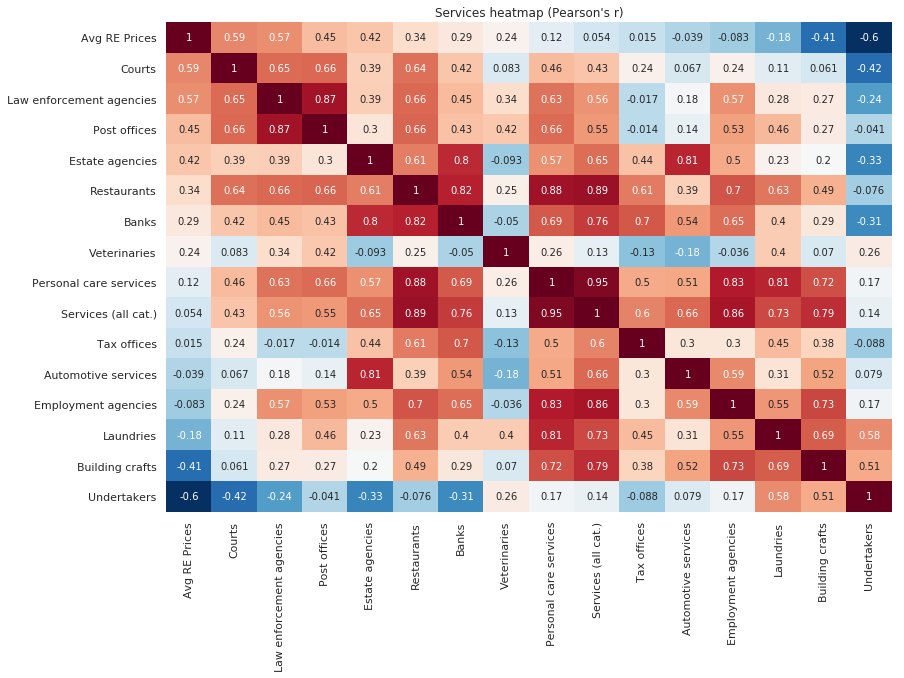

In [25]:
sns.set(rc={'figure.figsize':(13,9)}, font_scale=1)

ax = sns.heatmap(paris_service_offering.corr(), cmap='RdBu_r', annot=True, annot_kws={"size": 10}, cbar=False)
ax.set_title("Services heatmap (Pearson's r)")

plt.savefig('services_corr.png', bbox_inches='tight')

plt.show()

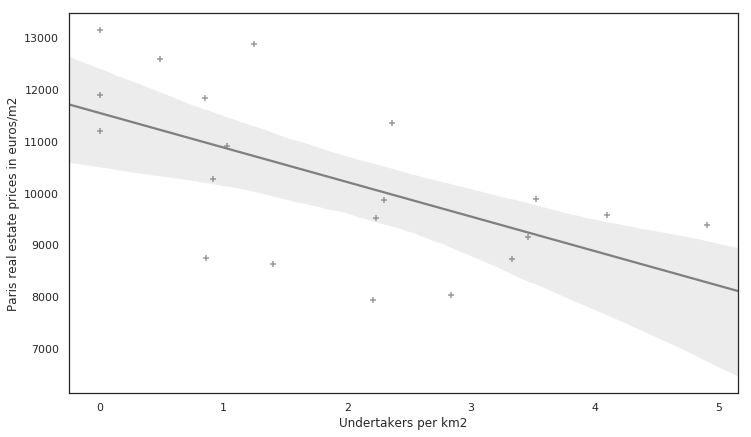

In [44]:
sns.set(style='white', rc={'figure.figsize':(12,7)}, palette="RdBu_r", font_scale=1)

ax = sns.regplot(x = paris_data['Undertakers'], y = paris_data['Avg RE Prices'], color='grey', marker = '+')

ax.set_title('')
ax.set_ylabel('Paris real estate prices in euros/m2')
ax.set_xlabel('Undertakers per km2')

plt.savefig('undertakers_plot.png', bbox_inches='tight')

plt.show()

<h3>2.4.4 Shop offering analysis</h3>

<h4>A. Map the shop offering density by borough</h4>

In [68]:
paris_map = folium.Map(location=[48.8566101, 2.3514992], zoom_start=12, max_zoom=12, min_zoom=12, tiles='Mapbox Bright', width=850, height=600)

threshold_scale = np.linspace(paris_data['Shop offering'].min(), paris_data['Shop offering'].max(), 6, dtype=int)
threshold_scale = threshold_scale.tolist()  
threshold_scale[-1] = threshold_scale[-1] + 1  

paris_map.choropleth(
    geo_data=paris_geodata,
    data=paris_data,
    columns=['l_aroff','Shop offering'],
    key_on='feature.properties.l_aroff',
    fill_color='BuPu', 
    fill_opacity=0.7, 
    line_opacity=0.5,
    threshold_scale = threshold_scale,
    legend_name='Paris shop offering density by borough',
    reset=True)

for lat, lng, arr, borough, price in zip(paris_data.Latitude, paris_data.Longitude, paris_data['Arr'], paris_data['l_aroff'], paris_data['Avg RE Prices']):
    folium.features.Marker(
        [lat, lng],
        popup = folium.Popup(str(arr) + '. ' + str(borough) + ': ' + str(price) + ' euros/m2'),
        ).add_to(paris_map)   

paris_map.save('shop_offering.html')

<h4>B. Explore correlations</h4>

### Pearson's r

In [25]:
pearson_coef, p_value = stats.pearsonr(paris_data['Avg RE Prices'], paris_data['Shop offering'])
print("Correlation between shop offering (all categories) per km2 and Paris average real estate prices: \nR =", pearson_coef.round(4), "with P =", p_value.round(4)) 
print('---')
pearson_coef, p_value = stats.pearsonr(paris_data['Avg RE Prices'], paris_data['Personal goods'])
print("Correlation between personal goods stores per km2 and Paris average real estate prices: \nR =", pearson_coef.round(4), "with P =", p_value.round(4)) 
print('---')
pearson_coef, p_value = stats.pearsonr(paris_data['Avg RE Prices'], paris_data['Household goods'])
print("Correlation between household goods stores per km2 and Paris average real estate prices: \nR =", pearson_coef.round(4), "with P =", p_value.round(4)) 
print('---')
pearson_coef, p_value = stats.pearsonr(paris_data['Avg RE Prices'], paris_data['Florists'])
print("Correlation between florists per km2 and Paris average real estate prices: \nR =", pearson_coef.round(4), "with P =", p_value.round(4)) 
print('---')
pearson_coef, p_value = stats.pearsonr(paris_data['Avg RE Prices'], paris_data['Books & stationery'])
print("Correlation between books & stationery shops per km2 and Paris average real estate prices: \nR =", pearson_coef.round(4), "with P =", p_value.round(4)) 
print('---')
pearson_coef, p_value = stats.pearsonr(paris_data['Avg RE Prices'], paris_data['Gas stations'])
print("Correlation between gas stations per km2 and Paris average real estate prices: \nR =", pearson_coef.round(4), "with P =", p_value.round(4)) 
print('---')
pearson_coef, p_value = stats.pearsonr(paris_data['Avg RE Prices'], paris_data['Supermarkets'])
print("Correlation between Supermarkets per km2 and Paris average real estate prices: \nR =", pearson_coef.round(4), "with P =", p_value.round(4)) 
print('---')
pearson_coef, p_value = stats.pearsonr(paris_data['Avg RE Prices'], paris_data['Convenience stores'])
print("Correlation between Convenience stores per km2 and Paris average real estate prices: \nR =", pearson_coef.round(4), "with P =", p_value.round(4)) 
print('---')
pearson_coef, p_value = stats.pearsonr(paris_data['Avg RE Prices'], paris_data['Food shops'])
print("Correlation between Food shops per km2 and Paris average real estate prices: \nR =", pearson_coef.round(4), "with P =", p_value.round(4)) 

Correlation between shop offering (all categories) per km2 and Paris average real estate prices: 
R = 0.5862 with P = 0.0066
---
Correlation between personal goods stores per km2 and Paris average real estate prices: 
R = 0.6049 with P = 0.0047
---
Correlation between household goods stores per km2 and Paris average real estate prices: 
R = 0.5981 with P = 0.0053
---
Correlation between florists per km2 and Paris average real estate prices: 
R = 0.5921 with P = 0.006
---
Correlation between books & stationery shops per km2 and Paris average real estate prices: 
R = 0.5752 with P = 0.008
---
Correlation between gas stations per km2 and Paris average real estate prices: 
R = -0.5207 with P = 0.0186
---
Correlation between Supermarkets per km2 and Paris average real estate prices: 
R = -0.4329 with P = 0.0566
---
Correlation between Convenience stores per km2 and Paris average real estate prices: 
R = -0.1847 with P = 0.4355
---
Correlation between Food shops per km2 and Paris average rea

### Spearman's rho

In [26]:
spearman_coef, p_value = stats.spearmanr(paris_data['Avg RE Prices'], paris_data['Shop offering'])
print("Spearman Correlation between shop offering (all categories) per km2 and Paris average real estate prices: \nR =", spearman_coef.round(4), "with P =", p_value.round(4)) 
print('---')
spearman_coef, p_value = stats.spearmanr(paris_data['Avg RE Prices'], paris_data['Personal goods'])
print("Spearman Correlation between personal goods stores per km2 and Paris average real estate prices: \nR =", spearman_coef.round(4), "with P =", p_value.round(4)) 
print('---')
spearman_coef, p_value = stats.spearmanr(paris_data['Avg RE Prices'], paris_data['Household goods'])
print("Spearman Correlation between household goods stores per km2 and Paris average real estate prices: \nR =", spearman_coef.round(4), "with P =", p_value.round(4)) 
print('---')
spearman_coef, p_value = stats.spearmanr(paris_data['Avg RE Prices'], paris_data['Florists'])
print("Spearman Correlation between florists per km2 and Paris average real estate prices: \nR =", spearman_coef.round(4), "with P =", p_value.round(4)) 
print('---')
spearman_coef, p_value = stats.spearmanr(paris_data['Avg RE Prices'], paris_data['Books & stationery'])
print("Spearman Correlation between books & stationery shops per km2 and Paris average real estate prices: \nR =", spearman_coef.round(4), "with P =", p_value.round(4)) 
print('---')
spearman_coef, p_value = stats.spearmanr(paris_data['Avg RE Prices'], paris_data['Gas stations'])
print("Spearman Correlation between gas stations per km2 and Paris average real estate prices: \nR =", spearman_coef.round(4), "with P =", p_value.round(4)) 
print('---')
spearman_coef, p_value = stats.spearmanr(paris_data['Avg RE Prices'], paris_data['Supermarkets'])
print("Spearman Correlation between Supermarkets per km2 and Paris average real estate prices: \nR =", spearman_coef.round(4), "with P =", p_value.round(4)) 
print('---')
spearman_coef, p_value = stats.spearmanr(paris_data['Avg RE Prices'], paris_data['Convenience stores'])
print("Spearman Correlation between Convenience stores per km2 and Paris average real estate prices: \nR =", spearman_coef.round(4), "with P =", p_value.round(4)) 
print('---')
spearman_coef, p_value = stats.spearmanr(paris_data['Avg RE Prices'], paris_data['Food shops'])
print("Spearman Correlation between Food shops per km2 and Paris average real estate prices: \nR =", spearman_coef.round(4), "with P =", p_value.round(4)) 

Correlation between shop offering (all categories) per km2 and Paris average real estate prices: 
R = 0.6195 with P = 0.0036
---
Correlation between personal goods stores per km2 and Paris average real estate prices: 
R = 0.6571 with P = 0.0016
---
Correlation between household goods stores per km2 and Paris average real estate prices: 
R = 0.6015 with P = 0.005
---
Correlation between florists per km2 and Paris average real estate prices: 
R = 0.5579 with P = 0.0106
---
Correlation between books & stationery shops per km2 and Paris average real estate prices: 
R = 0.6421 with P = 0.0023
---
Correlation between gas stations per km2 and Paris average real estate prices: 
R = -0.4894 with P = 0.0285
---
Correlation between Supermarkets per km2 and Paris average real estate prices: 
R = -0.4451 with P = 0.0492
---
Correlation between Convenience stores per km2 and Paris average real estate prices: 
R = -0.1609 with P = 0.498
---
Correlation between Food shops per km2 and Paris average rea

> <p><b><i>Table 3. Moderate to strong correlations between shop offering density and Paris real estate prices</i></b></p>

| Features | Pearson's r | p value | Spearman's rho | p value |
|---|---|---|---|---|
| Personal goods stores per km2 | 0.6 | 0.004 | 0.65 | 0.001 |
| Household goods stores per km2 | 0.6 | 0.005 | 0.6 | 0.005 |
| Florists per km2 | 0.6 | 0.006 | 0.55 | 0.01 |
| Shops (all categories) per km2 | 0.59 | 0.006 | 0.62 | 0.003 | 
| Books & stationery shops per km2 | 0.57 | 0.008 | 0.64 | 0.002 |
| Gas stations per km2 | -0.52 | 0.02 | -0.49 | 0.02 |
| Supermarkets per km2 | -0.43 | 0.06 | -0.44 | 0.05 |

In [28]:
# Gather the shop offering indicators

paris_shop_offering = paris_data[['Avg RE Prices',
 'Personal goods',
 'Household goods',
 'Florists',                                  
 'Books & stationery shops',  
 'Shops (all cat.)',    
 'Food shops',                                  
 'Convenience stores',
 'Supermarkets',
 'Gas stations',
]]

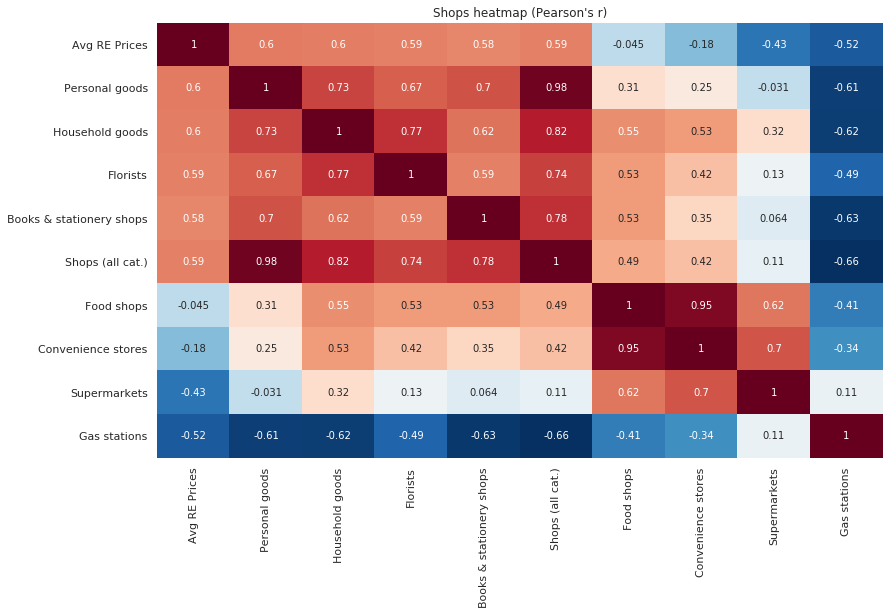

In [30]:
sns.set(rc={'figure.figsize':(13,8)}, font_scale=1)

ax = sns.heatmap(paris_shop_offering.corr(), cmap='RdBu_r', annot=True, annot_kws={"size": 10}, cbar=False)
ax.set_title("Shops heatmap (Pearson's r)")

plt.savefig('shops_corr.png', bbox_inches='tight')

plt.show()

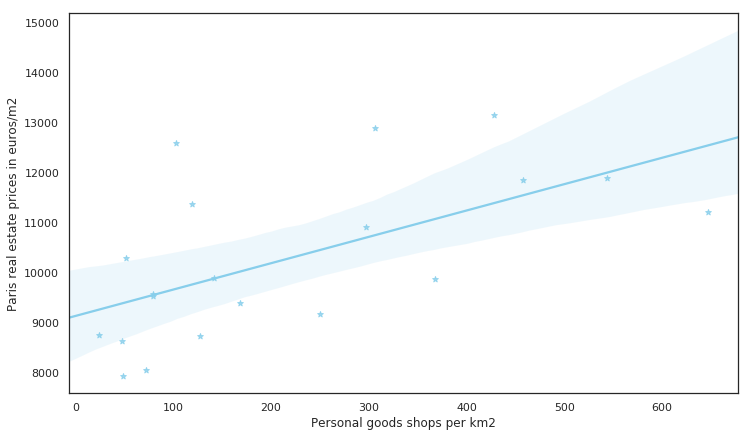

In [56]:
sns.set(style='white', rc={'figure.figsize':(12,7)}, palette="RdBu_r", font_scale=1)

ax = sns.regplot(x = paris_data['Personal goods'], y = paris_data['Avg RE Prices'], color='skyblue', marker = '*')

ax.set_title('')
ax.set_ylabel('Paris real estate prices in euros/m2')
ax.set_xlabel('Personal goods shops per km2')

plt.savefig('personal_goods_plot.png', bbox_inches='tight')

plt.show()

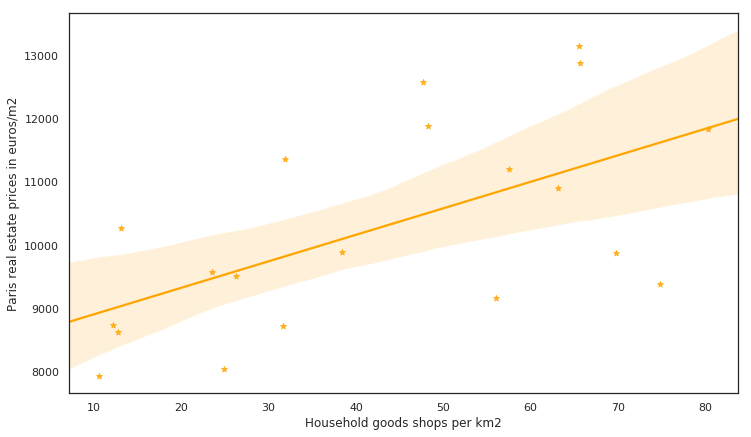

In [57]:
sns.set(style='white', rc={'figure.figsize':(12,7)}, palette="RdBu_r", font_scale=1)

ax = sns.regplot(x = paris_data['Household goods'], y = paris_data['Avg RE Prices'], color='orange', marker = '*')

ax.set_title('')
ax.set_ylabel('Paris real estate prices in euros/m2')
ax.set_xlabel('Household goods shops per km2')

plt.savefig('household_goods_plot.png', bbox_inches='tight')

plt.show()

In [ ]:
sns.set(style='darkgrid', rc={'figure.figsize':(13,7)}, palette="RdBu_r", font_scale=1.1)

ax = sns.regplot(x = paris_data['Personal goods'], label='Personal goods', y = paris_data['Avg RE Prices'], truncate=True, color='purple')
ax = sns.regplot(x = paris_data['Shop offering'], label='Shop offering', y = paris_data['Avg RE Prices'], truncate=True, color='orange', marker = '^')

ax.legend(frameon=False, loc='upper right', borderaxespad=1.9)

ax.set_title('Shop offering and Paris real estate prices')
ax.set_ylabel('Paris real estate prices in euros/m2')
ax.set_xlabel('Number of shops per km2')

plt.show()

<h3>2.4.5 Popular venues analysis</h3>

<h4>A. Map the popular venues density by borough</h4>

In [5]:
paris_map = folium.Map(location=[48.8566101, 2.3514992], zoom_start=12, max_zoom=12, min_zoom=12, tiles='Mapbox Bright', width=850, height=600)

threshold_scale = np.linspace(paris_data['Popular venues'].min(), paris_data['Popular venues'].max(), 6, dtype=int)
threshold_scale = threshold_scale.tolist()  
threshold_scale[-1] = threshold_scale[-1] + 1  

paris_map.choropleth(
    geo_data=paris_geodata,
    data=paris_data,
    columns=['l_aroff','Popular venues'],
    key_on='feature.properties.l_aroff',
    fill_color='BuPu', 
    fill_opacity=0.8, 
    line_opacity=0.5,
    threshold_scale=threshold_scale,
    legend_name='Paris popular venues density by borough',
    reset=True)

for lat, lng, arr, borough, price in zip(paris_data.Latitude, paris_data.Longitude, paris_data['Arr'], paris_data['l_aroff'], paris_data['Avg RE Prices']):
    folium.features.Marker(
        [lat, lng],
        popup = folium.Popup(str(arr) + '. ' + str(borough) + ': ' + str(price) + ' euros/m2'),
        ).add_to(paris_map)    

paris_map.save('popular_venues.html')

<h4>B. Explore correlations</h4>

### Pearson's r

In [23]:
pearson_coef, p_value = stats.pearsonr(paris_data['Avg RE Prices'], paris_data['Popular accommodation'])
print("Correlation between popular accommodations per km2 and Paris average real estate prices: \nR =", pearson_coef.round(4), "with P =", p_value.round(4)) 
print('---')
pearson_coef, p_value = stats.pearsonr(paris_data['Avg RE Prices'], paris_data['Popular touristic sites'])
print("Correlation between popular touristic sites per km2 and Paris average real estate prices: \nR =", pearson_coef.round(4), "with P =", p_value.round(4)) 
print('---')
pearson_coef, p_value = stats.pearsonr(paris_data['Avg RE Prices'], paris_data['Popular culture & entertainment places'])
print("Correlation between popular culture & entertainment places per km2 and Paris average real estate prices: \nR =", pearson_coef.round(4), "with P =", p_value.round(4)) 
print('---')
pearson_coef, p_value = stats.pearsonr(paris_data['Avg RE Prices'], paris_data['Popular shops & markets'])
print("Correlation between popular shops & markets per km2 and Paris average real estate prices: \nR =", pearson_coef.round(4), "with P =", p_value.round(4)) 
print('---')
pearson_coef, p_value = stats.pearsonr(paris_data['Avg RE Prices'], paris_data['Popular venues'])
print("Correlation between popular venues (all categories) per km2 and Paris average real estate prices: \nR =", pearson_coef.round(4), "with P =", p_value.round(4)) 
print('---')
pearson_coef, p_value = stats.pearsonr(paris_data['Avg RE Prices'], paris_data['Popular restaurants'])
print("Correlation between popular restaurants per km2 and Paris average real estate prices: \nR =", pearson_coef.round(4), "with P =", p_value.round(4)) 
print('---')
pearson_coef, p_value = stats.pearsonr(paris_data['Avg RE Prices'], paris_data['Popular bars, pubs & cafés'])
print("Correlation between popular bars, pubs & cafés per km2 and Paris average real estate prices: \nR =", pearson_coef.round(4), "with P =", p_value.round(4)) 
print('---')
pearson_coef, p_value = stats.pearsonr(paris_data['Avg RE Prices'], paris_data['Popular beauty care places'])
print("Correlation between Popular beauty care places per km2 and Paris average real estate prices: \nR =", pearson_coef.round(4), "with P =", p_value.round(4)) 
print('---')
pearson_coef, p_value = stats.pearsonr(paris_data['Avg RE Prices'], paris_data['Popular easy food places'])
print("Correlation between Popular easy food places per km2 and Paris average real estate prices: \nR =", pearson_coef.round(4), "with P =", p_value.round(4)) 
print('---')
pearson_coef, p_value = stats.pearsonr(paris_data['Avg RE Prices'], paris_data['Popular nightclubs'])
print("Correlation between Popular nightclubs, pubs & cafés per km2 and Paris average real estate prices: \nR =", pearson_coef.round(4), "with P =", p_value.round(4)) 
print('---')
pearson_coef, p_value = stats.pearsonr(paris_data['Avg RE Prices'], paris_data['Popular sport activity places'])
print("Correlation between Popular sport activity places per km2 and Paris average real estate prices: \nR =", pearson_coef.round(4), "with P =", p_value.round(4)) 

Correlation between popular accommodations per km2 and Paris average real estate prices: 
R = 0.7491 with P = 0.0001
---
Correlation between popular touristic sites per km2 and Paris average real estate prices: 
R = 0.7294 with P = 0.0003
---
Correlation between popular culture & entertainment places per km2 and Paris average real estate prices: 
R = 0.6743 with P = 0.0011
---
Correlation between popular shops & markets per km2 and Paris average real estate prices: 
R = 0.6475 with P = 0.002
---
Correlation between popular venues (all categories) per km2 and Paris average real estate prices: 
R = 0.6379 with P = 0.0025
---
Correlation between popular restaurants per km2 and Paris average real estate prices: 
R = 0.5944 with P = 0.0057
---
Correlation between popular bars, pubs & cafés per km2 and Paris average real estate prices: 
R = 0.5225 with P = 0.0181
---
Correlation between Popular beauty care places per km2 and Paris average real estate prices: 
R = 0.2919 with P = 0.2117
---
C

### Spearman's rho

In [24]:
spearman_coef, p_value = stats.spearmanr(paris_data['Avg RE Prices'], paris_data['Popular accommodation'])
print("Spearman Correlation between popular accommodations per km2 and Paris average real estate prices: \nR =", spearman_coef.round(4), "with P =", p_value.round(4)) 
print('---')
spearman_coef, p_value = stats.spearmanr(paris_data['Avg RE Prices'], paris_data['Popular touristic sites'])
print("Spearman Correlation between popular touristic sites per km2 and Paris average real estate prices: \nR =", spearman_coef.round(4), "with P =", p_value.round(4)) 
print('---')
spearman_coef, p_value = stats.spearmanr(paris_data['Avg RE Prices'], paris_data['Popular culture & entertainment places'])
print("Spearman Correlation between popular culture & entertainment places per km2 and Paris average real estate prices: \nR =", spearman_coef.round(4), "with P =", p_value.round(4)) 
print('---')
spearman_coef, p_value = stats.spearmanr(paris_data['Avg RE Prices'], paris_data['Popular shops & markets'])
print("Spearman Correlation between popular shops & markets per km2 and Paris average real estate prices: \nR =", spearman_coef.round(4), "with P =", p_value.round(4)) 
print('---')
spearman_coef, p_value = stats.spearmanr(paris_data['Avg RE Prices'], paris_data['Popular venues'])
print("Spearman Correlation between popular venues (all categories) per km2 and Paris average real estate prices: \nR =", spearman_coef.round(4), "with P =", p_value.round(4)) 
print('---')
spearman_coef, p_value = stats.spearmanr(paris_data['Avg RE Prices'], paris_data['Popular restaurants'])
print("Spearman Correlation between popular restaurants per km2 and Paris average real estate prices: \nR =", spearman_coef.round(4), "with P =", p_value.round(4)) 
print('---')
spearman_coef, p_value = stats.spearmanr(paris_data['Avg RE Prices'], paris_data['Popular bars, pubs & cafés'])
print("Spearman Correlation between popular bars, pubs & cafés per km2 and Paris average real estate prices: \nR =", spearman_coef.round(4), "with P =", p_value.round(4)) 
print('---')
spearman_coef, p_value = stats.spearmanr(paris_data['Avg RE Prices'], paris_data['Popular beauty care places'])
print("Spearman Correlation between Popular beauty care places per km2 and Paris average real estate prices: \nR =", spearman_coef.round(4), "with P =", p_value.round(4)) 
print('---')
spearman_coef, p_value = stats.spearmanr(paris_data['Avg RE Prices'], paris_data['Popular easy food places'])
print("Spearman Correlation between Popular easy food places per km2 and Paris average real estate prices: \nR =", spearman_coef.round(4), "with P =", p_value.round(4)) 
print('---')
spearman_coef, p_value = stats.spearmanr(paris_data['Avg RE Prices'], paris_data['Popular nightclubs'])
print("Spearman Correlation between Popular nightclubs, pubs & cafés per km2 and Paris average real estate prices: \nR =", spearman_coef.round(4), "with P =", p_value.round(4)) 
print('---')
spearman_coef, p_value = stats.spearmanr(paris_data['Avg RE Prices'], paris_data['Popular sport activity places'])
print("Spearman Correlation between Popular sport activity places per km2 and Paris average real estate prices: \nR =", spearman_coef.round(4), "with P =", p_value.round(4)) 

Correlation between popular accommodations per km2 and Paris average real estate prices: 
R = 0.7243 with P = 0.0003
---
Correlation between popular touristic sites per km2 and Paris average real estate prices: 
R = 0.7083 with P = 0.0005
---
Correlation between popular culture & entertainment places per km2 and Paris average real estate prices: 
R = 0.7289 with P = 0.0003
---
Correlation between popular shops & markets per km2 and Paris average real estate prices: 
R = 0.6371 with P = 0.0025
---
Correlation between popular venues (all categories) per km2 and Paris average real estate prices: 
R = 0.6496 with P = 0.0019
---
Correlation between popular restaurants per km2 and Paris average real estate prices: 
R = 0.6526 with P = 0.0018
---
Correlation between popular bars, pubs & cafés per km2 and Paris average real estate prices: 
R = 0.5167 with P = 0.0197
---
Correlation between Popular beauty care places per km2 and Paris average real estate prices: 
R = 0.1759 with P = 0.4582
---


> <p><b><i>Table 4. Moderate to strong correlations between popular venues density and Paris real estate prices</i></b></p>

| Features | Pearson's r | p value | Spearman's rho | p value |
|---|---|---|---|---|
| Popular hotels per km2 | 0.75 | 0.0001 | 0.72 | 0.0003 |
| Popular touristic sites per km2 | 0.73 | 0.0003 | 0.7 | 0.0005 |
| Popular culture & entertainment places per km2 | 0.67 | 0.001 | 0.73 | 0.0003
| Popular shops & markets per km2 | 0.65 | 0.002 | 0.64 | 0.002 |
| Popular venues (all categories) per km2 | 0.64 | 0.002 | 0.65 | 0.002 |
| Popular restaurants per km2 | 0.6 | 0.005 | 0.65 | 0.002 |
| Popular bars, pubs & cafés per km2 | 0.5 | 0.02 | 0.52 | 0.02 |

In [58]:
# Gather the popular venues features

paris_popular_venues = paris_data[['Avg RE Prices',
 'Popular hotels',
 'Popular touristic sites',
 'Pop. culture & entertainment places',
 'Popular shops & markets',    
 'Popular venues (all cat.)',                                   
 'Popular restaurants',
 'Popular bars, pubs & cafés',
 'Popular nightclubs',
 'Popular easy food places',                                                                  
 'Popular beauty care places',
 'Popular sport activity places']]

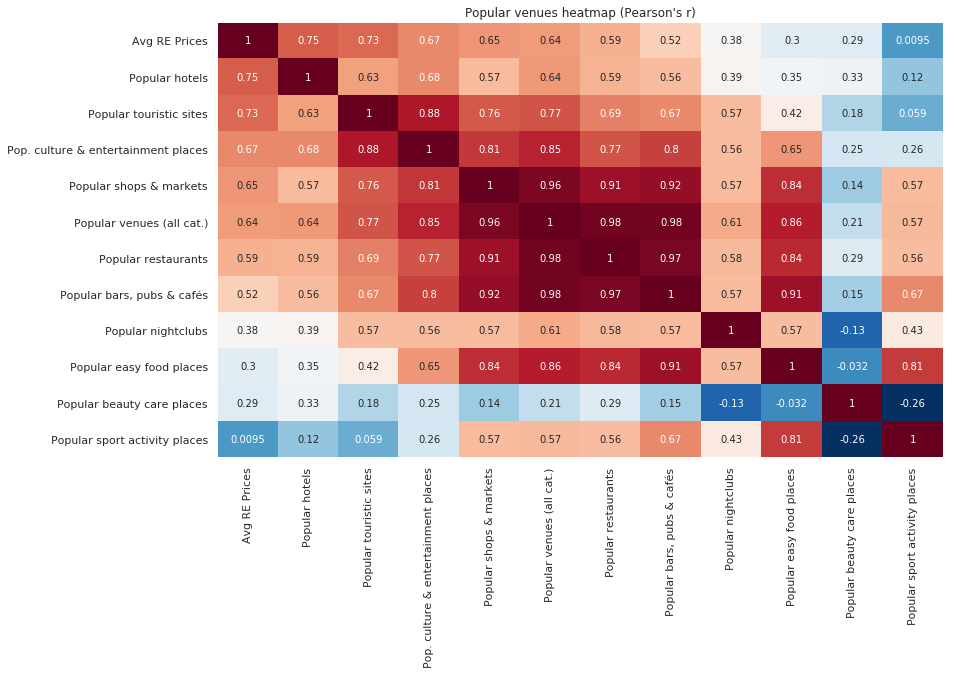

In [59]:
sns.set(rc={'figure.figsize':(13,8)}, font_scale=1)

ax = sns.heatmap(paris_popular_venues.corr(), cmap='RdBu_r', annot=True, annot_kws={"size": 10}, cbar=False)
ax.set_title("Popular venues heatmap (Pearson's r)")

plt.savefig('popular_venues.png', bbox_inches='tight')

plt.show()

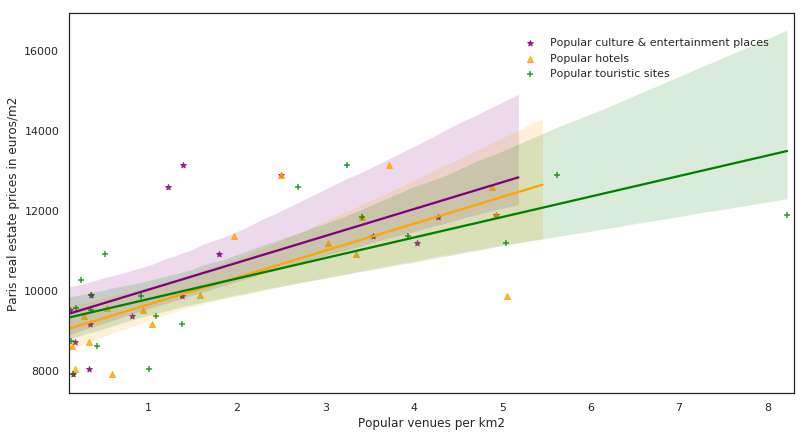

In [4]:
sns.set(style='white', rc={'figure.figsize':(13,7)}, palette="RdBu_r", font_scale=1)

ax = sns.regplot(x = paris_data['Pop. culture & entertainment places'], label='Popular culture & entertainment places', y = paris_data['Avg RE Prices'],color='purple', marker = '*')
ax = sns.regplot(x = paris_data['Popular hotels'], label='Popular hotels', y = paris_data['Avg RE Prices'], color='orange', marker = '^')
ax = sns.regplot(x = paris_data['Popular touristic sites'], label='Popular touristic sites', y = paris_data['Avg RE Prices'],truncate=True, color='green', marker = '+')

ax.legend(frameon=False, loc='upper right', borderaxespad=1.9)

ax.set_title('')
ax.set_ylabel('Paris real estate prices in euros/m2')
ax.set_xlabel('Popular venues per km2')
plt.xlim(0.1, 8.3)

plt.savefig('popular_venues_plot.png', bbox_inches='tight')

plt.show()

<h3>2.4.6 Municipal facilities</h3>

<h4>A. Map the municipal facilities density by borough</h4>

In [7]:
paris_map = folium.Map(location=[48.8566101, 2.3514992], zoom_start=12, max_zoom=12, min_zoom=12, tiles='Mapbox Bright', width=850, height=600)

threshold_scale = np.linspace(paris_data['Municipal facilities'].min(), paris_data['Municipal facilities'].max(), 6, dtype=int)
threshold_scale = threshold_scale.tolist()  
threshold_scale[-1] = threshold_scale[-1] + 1  

paris_map.choropleth(
    geo_data=paris_geodata,
    data=paris_data,
    columns=['l_aroff','Municipal facilities'],
    key_on='feature.properties.l_aroff',
    fill_color='BuPu', 
    fill_opacity=0.7, 
    line_opacity=0.5,
    threshold_scale = threshold_scale,
    legend_name='Paris municipal facilities density by borough',
    reset=True)

for lat, lng, arr, borough, price in zip(paris_data.Latitude, paris_data.Longitude, paris_data['Arr'], paris_data['l_aroff'], paris_data['Avg RE Prices']):
    folium.features.Marker(
        [lat, lng],
        popup = folium.Popup(str(arr) + '. ' + str(borough) + ': ' + str(price) + ' euros/m2'),
        ).add_to(paris_map)    

paris_map.save('municipal_facilities.html')

In [9]:
paris_map = folium.Map(location=[48.8566101, 2.3514992], zoom_start=12, max_zoom=12, min_zoom=12, tiles='Mapbox Bright', width=850, height=600)

threshold_scale = np.linspace(paris_data['Local sport facilities'].min(), paris_data['Local sport facilities'].max(), 6, dtype=int)
threshold_scale = threshold_scale.tolist()  
threshold_scale[-1] = threshold_scale[-1] + 1  

paris_map.choropleth(
    geo_data=paris_geodata,
    data=paris_data,
    columns=['l_aroff','Local sport facilities'],
    key_on='feature.properties.l_aroff',
    fill_color='BuPu', 
    fill_opacity=0.7, 
    line_opacity=0.5,
    threshold_scale = threshold_scale,
    legend_name='Paris local sport facilities density by borough',
    reset=True)

for lat, lng, arr, borough, price in zip(paris_data.Latitude, paris_data.Longitude, paris_data['Arr'], paris_data['l_aroff'], paris_data['Avg RE Prices']):
    folium.features.Marker(
        [lat, lng],
        popup = folium.Popup(str(arr) + '. ' + str(borough) + ': ' + str(price) + ' euros/m2'),
        ).add_to(paris_map)    

paris_map.save('sport_facilities.html')

<h4>B. Explore correlations</h4>

### Pearson's r

In [14]:
pearson_coef, p_value = stats.pearsonr(paris_data['Avg RE Prices'], paris_data['Municipal facilities'])
print("Correlation between municipal facilities per km2 and Paris average real estate prices: \nR =", pearson_coef.round(4), "with P =", p_value.round(4)) 
print('---')
pearson_coef, p_value = stats.pearsonr(paris_data['Avg RE Prices'], paris_data['Local sport facilities'])
print("Correlation between local sport facilities per km2 and Paris average real estate prices: \nR =", pearson_coef.round(4), "with P =", p_value.round(4)) 
print('---')
pearson_coef, p_value = stats.pearsonr(paris_data['Avg RE Prices'], paris_data['Collective daycare'])
print("Correlation between Collective daycare per km2 and Paris average real estate prices: \nR =", pearson_coef.round(4), "with P =", p_value.round(4)) 
print('---')
pearson_coef, p_value = stats.pearsonr(paris_data['Avg RE Prices'], paris_data['Community centres'])
print("Correlation between Community centres per km2 and Paris average real estate prices: \nR =", pearson_coef.round(4), "with P =", p_value.round(4)) 
print('---')
pearson_coef, p_value = stats.pearsonr(paris_data['Avg RE Prices'], paris_data['Squares & gardens'])
print("Correlation between Squares & gardens per km2 and Paris average real estate prices: \nR =", pearson_coef.round(4), "with P =", p_value.round(4)) 
print('---')
pearson_coef, p_value = stats.pearsonr(paris_data['Avg RE Prices'], paris_data['Rail stations'])
print("Correlation between Rail stations per km2 and Paris average real estate prices: \nR =", pearson_coef.round(4), "with P =", p_value.round(4)) 

Correlation between municipal facilities per km2 and Paris average real estate prices: 
R = -0.1509 with P = 0.5253
---
Correlation between local sport facilities per km2 and Paris average real estate prices: 
R = -0.5115 with P = 0.0212
---
Correlation between Collective daycare per km2 and Paris average real estate prices: 
R = -0.3193 with P = 0.1699
---
Correlation between Community centres per km2 and Paris average real estate prices: 
R = 0.1116 with P = 0.6394
---
Correlation between Squares & gardens per km2 and Paris average real estate prices: 
R = -0.1771 with P = 0.455
---
Correlation between Rail stations per km2 and Paris average real estate prices: 
R = 0.3023 with P = 0.1951


### Spearman's rho

In [15]:
spearman_coef, p_value = stats.spearmanr(paris_data['Avg RE Prices'], paris_data['Municipal facilities'])
print("Spearman Correlation between municipal facilities per km2 and Paris average real estate prices: \nR =", spearman_coef.round(4), "with P =", p_value.round(4)) 
print('---')
spearman_coef, p_value = stats.spearmanr(paris_data['Avg RE Prices'], paris_data['Local sport facilities'])
print("Spearman Correlation between local sport facilities per km2 and Paris average real estate prices: \nR =", spearman_coef.round(4), "with P =", p_value.round(4)) 
print('---')
spearman_coef, p_value = stats.spearmanr(paris_data['Avg RE Prices'], paris_data['Collective daycare'])
print("Spearman Correlation between Collective daycare per km2 and Paris average real estate prices: \nR =", spearman_coef.round(4), "with P =", p_value.round(4)) 
print('---')
spearman_coef, p_value = stats.spearmanr(paris_data['Avg RE Prices'], paris_data['Community centres'])
print("Spearman Correlation between Community centres per km2 and Paris average real estate prices: \nR =", spearman_coef.round(4), "with P =", p_value.round(4)) 
print('---')
spearman_coef, p_value = stats.spearmanr(paris_data['Avg RE Prices'], paris_data['Squares & gardens'])
print("Spearman Correlation between Squares & gardens per km2 and Paris average real estate prices: \nR =", spearman_coef.round(4), "with P =", p_value.round(4)) 
print('---')
spearman_coef, p_value = stats.spearmanr(paris_data['Avg RE Prices'], paris_data['Rail stations'])
print("Spearman Correlation between Rail stations per km2 and Paris average real estate prices: \nR =", spearman_coef.round(4), "with P =", p_value.round(4)) 

Correlation between municipal facilities per km2 and Paris average real estate prices: 
R = -0.212 with P = 0.3695
---
Correlation between local sport facilities per km2 and Paris average real estate prices: 
R = -0.5173 with P = 0.0195
---
Correlation between Collective daycare per km2 and Paris average real estate prices: 
R = -0.4481 with P = 0.0475
---
Correlation between Community centres per km2 and Paris average real estate prices: 
R = 0.0241 with P = 0.9198
---
Correlation between Squares & gardens per km2 and Paris average real estate prices: 
R = -0.2135 with P = 0.366
---
Correlation between Rail stations per km2 and Paris average real estate prices: 
R = 0.3414 with P = 0.1408


> <p><b><i>Table 4. Moderate correlations between municipal facilities density and Paris real estate prices</i></b></p>

| Features | Pearson's r | p value | Spearman's rho | p value |
|---|---|---|---|---|
| Local sport facilities per km2 | -0.51 | 0.02 | -0.52 | 0.02 |
| Collective daycare per km2 | -0.32 | 0.2 | -0.45 | 0.05 |

In [78]:
# Gather the municipal facilities features

paris_municipal_facilities = paris_data[['Avg RE Prices',
 'Rail stations',
 'Community centres',
 'Municipal facilities (all cat.)',
 'Squares & gardens',
 'Collective daycares',
 'Local sport facilities']]

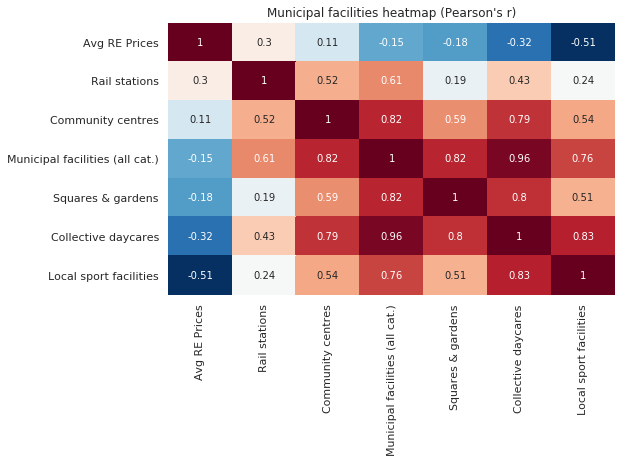

In [80]:
sns.set(rc={'figure.figsize':(8,5)}, font_scale=1)

ax = sns.heatmap(paris_municipal_facilities.corr(), cmap='RdBu_r', annot=True, annot_kws={"size": 10}, cbar=False)
ax.set_title("Municipal facilities heatmap (Pearson's r)")

plt.savefig('municipal_facilities_corr.png', bbox_inches='tight')

plt.show()

<h3>2.4.7 Education offering</h3>

<h4>A. Map the education offering density by borough</h4>

In [84]:
paris_map = folium.Map(location=[48.8566101, 2.3514992], zoom_start=12, max_zoom=12, min_zoom=12, tiles='Mapbox Bright', width=850, height=600)

threshold_scale = np.linspace(paris_data['Education Offering'].min(), paris_data['Education Offering'].max(), 6, dtype=int)
threshold_scale = threshold_scale.tolist()  
threshold_scale[-1] = threshold_scale[-1] + 1  

paris_map.choropleth(
    geo_data=paris_geodata,
    data=paris_data,
    columns=['l_aroff','Education Offering'],
    key_on='feature.properties.l_aroff',
    fill_color='BuPu', 
    fill_opacity=0.7, 
    line_opacity=0.5,
    threshold_scale = threshold_scale,
    legend_name='Paris education offering density by borough',
    reset=True)

for lat, lng, arr, borough, price in zip(paris_data.Latitude, paris_data.Longitude, paris_data['Arr'], paris_data['l_aroff'], paris_data['Avg RE Prices']):
    folium.features.Marker(
        [lat, lng],
        popup = folium.Popup(str(arr) + '. ' + str(borough) + ': ' + str(price) + ' euros/m2'),
        ).add_to(paris_map) 

paris_map.save('education_offering.html')

<h4>B. Explore correlations</h4>

In [8]:
pearson_coef, p_value = stats.pearsonr(paris_data['Avg RE Prices'], paris_data['Education Offering'])
print("Correlation between education offering per km2 and Paris average real estate prices: \nR =", pearson_coef.round(4), "with P =", p_value.round(4)) 
print('---')
pearson_coef, p_value = stats.pearsonr(paris_data['Avg RE Prices'], paris_data['Private education'])
print("Correlation between private education establishments per km2 and Paris average real estate prices: \nR =", pearson_coef.round(4), "with P =", p_value.round(4)) 
print('---')
pearson_coef, p_value = stats.pearsonr(paris_data['Avg RE Prices'], paris_data['Higher education'])
print("Correlation between Higher education establishments per km2 and Paris average real estate prices: \nR =", pearson_coef.round(4), "with P =", p_value.round(4)) 
print('---')
pearson_coef, p_value = stats.pearsonr(paris_data['Avg RE Prices'], paris_data['Primary education'])
print("Correlation between Primary education establishments per km2 and Paris average real estate prices: \nR =", pearson_coef.round(4), "with P =", p_value.round(4)) 
print('---')
pearson_coef, p_value = stats.pearsonr(paris_data['Avg RE Prices'], paris_data['Secondary education'])
print("Correlation between Secondary education establishments per km2 and Paris average real estate prices: \nR =", pearson_coef.round(4), "with P =", p_value.round(4)) 
print('---')
pearson_coef, p_value = stats.pearsonr(paris_data['Avg RE Prices'], paris_data['Public education'])
print("Correlation between Public education establishments per km2 and Paris average real estate prices: \nR =", pearson_coef.round(4), "with P =", p_value.round(4)) 

Correlation between education offering per km2 and Paris average real estate prices: 
R = 0.2975 with P = 0.2026
---
Correlation between private education establishments per km2 and Paris average real estate prices: 
R = 0.5128 with P = 0.0208
---
Correlation between Higher education establishments per km2 and Paris average real estate prices: 
R = 0.4416 with P = 0.0512
---
Correlation between Primary education establishments per km2 and Paris average real estate prices: 
R = -0.3996 with P = 0.0809
---
Correlation between Secondary education establishments per km2 and Paris average real estate prices: 
R = 0.2733 with P = 0.2437
---
Correlation between Public education establishments per km2 and Paris average real estate prices: 
R = 0.1748 with P = 0.461


### Spearman's rho

In [9]:
spearman_coef, p_value = stats.spearmanr(paris_data['Avg RE Prices'], paris_data['Education Offering'])
print("Spearman Correlation between education offering per km2 and Paris average real estate prices: \nR =", spearman_coef.round(4), "with P =", p_value.round(4)) 
print('---')
spearman_coef, p_value = stats.spearmanr(paris_data['Avg RE Prices'], paris_data['Private education'])
print("Spearman Correlation between private education establishments per km2 and Paris average real estate prices: \nR =", spearman_coef.round(4), "with P =", p_value.round(4)) 
print('---')
spearman_coef, p_value = stats.spearmanr(paris_data['Avg RE Prices'], paris_data['Higher education'])
print("Spearman Correlation between Higher education establishments per km2 and Paris average real estate prices: \nR =", spearman_coef.round(4), "with P =", p_value.round(4)) 
print('---')
spearman_coef, p_value = stats.spearmanr(paris_data['Avg RE Prices'], paris_data['Primary education'])
print("Spearman Correlation between Primary education establishments per km2 and Paris average real estate prices: \nR =", spearman_coef.round(4), "with P =", p_value.round(4)) 
print('---')
spearman_coef, p_value = stats.spearmanr(paris_data['Avg RE Prices'], paris_data['Secondary education'])
print("Spearman Correlation between Secondary education establishments per km2 and Paris average real estate prices: \nR =", spearman_coef.round(4), "with P =", p_value.round(4)) 
print('---')
spearman_coef, p_value = stats.spearmanr(paris_data['Avg RE Prices'], paris_data['Public education'])
print("Spearman Correlation between Public education establishments per km2 and Paris average real estate prices: \nR =", spearman_coef.round(4), "with P =", p_value.round(4)) 

Spearman Correlation between education offering per km2 and Paris average real estate prices: 
R = -0.0331 with P = 0.8899
---
Spearman Correlation between private education establishments per km2 and Paris average real estate prices: 
R = 0.418 with P = 0.0666
---
Spearman Correlation between Higher education establishments per km2 and Paris average real estate prices: 
R = 0.5904 with P = 0.0061
---
Spearman Correlation between Primary education establishments per km2 and Paris average real estate prices: 
R = -0.4602 with P = 0.0412
---
Spearman Correlation between Secondary education establishments per km2 and Paris average real estate prices: 
R = 0.1143 with P = 0.6314
---
Spearman Correlation between Public education establishments per km2 and Paris average real estate prices: 
R = -0.1068 with P = 0.6541


> <p><b><i>Table 4. Moderate to strong correlations between education offering density and Paris real estate prices</i></b></p>

| Features | Pearson's r | p value | Spearman's rho | p value |
|---|---|---|---|---|
| Private education establishments per km2 | 0.51 | 0.02 | 0.41 | 0.07 |
| Higher education establishments per km2 | 0.44 | 0.05 | 0.6 | 0.006 |


In [82]:
# Gather the education offering features

paris_education_offering = paris_data[['Avg RE Prices',
 'Private education',
 'Higher education',
 'Education (all cat.)',                                       
 'Secondary education',
 'Public education',                                    
 'Primary education']]

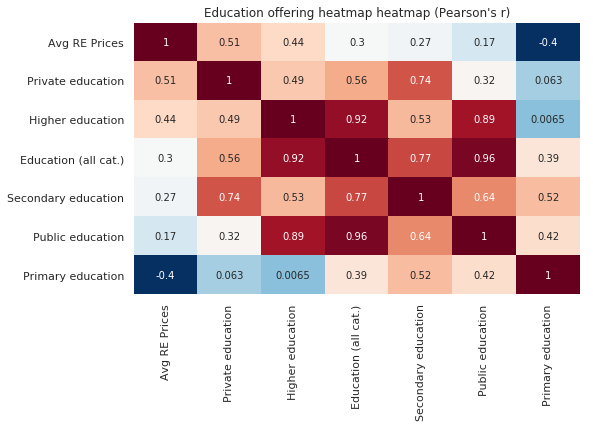

In [83]:
sns.set(rc={'figure.figsize':(8,5)}, font_scale=1)

ax = sns.heatmap(paris_education_offering.corr(), cmap='RdBu_r', annot=True, annot_kws={"size": 10}, cbar=False)
ax.set_title("Education offering heatmap heatmap (Pearson's r)")

plt.savefig('education_corr.png', bbox_inches='tight')

plt.show()

<h3>2.4.8 Social housing analysis</h3>

<h4>A. Map the social housing density by borough</h4>

In [32]:
paris_map = folium.Map(location=[48.8566101, 2.3514992], zoom_start=12, max_zoom=12, min_zoom=12, tiles='Mapbox Bright', width=850, height=600)

threshold_scale = np.linspace(paris_data['Social housing'].min(), paris_data['Social housing'].max(), 6, dtype=int)
threshold_scale = threshold_scale.tolist()  
threshold_scale[-1] = threshold_scale[-1] + 1  

paris_map.choropleth(
    geo_data=paris_geodata,
    data=paris_data,
    columns=['l_aroff','Social housing'],
    key_on='feature.properties.l_aroff',
    fill_color='BuPu', 
    fill_opacity=0.7, 
    line_opacity=0.5,
    threshold_scale = threshold_scale,
    legend_name='Paris social housing density by borough',
    reset=True)

for lat, lng, arr, borough, price in zip(paris_data.Latitude, paris_data.Longitude, paris_data['Arr'], paris_data['l_aroff'], paris_data['Avg RE Prices']):
    folium.features.Marker(
        [lat, lng],
        popup = folium.Popup(str(arr) + '. ' + str(borough) + ': ' + str(price) + ' euros/m2'),
        ).add_to(paris_map)   

paris_map.save('social_housing.html')

<h4>B. Explore correlations</h4>

In [19]:
pearson_coef, p_value = stats.pearsonr(paris_data['Avg RE Prices'], paris_data['SH via construction'])
print("Correlation between social housing construction per km2 and Paris average real estate prices: \nR =", pearson_coef.round(4), "with P =", p_value.round(4)) 
print('---')
pearson_coef, p_value = stats.pearsonr(paris_data['Avg RE Prices'], paris_data['Social housing'])
print("Correlation between social housing (all categories) per km2 and Paris average real estate prices: \nR =", pearson_coef.round(4), "with P =", p_value.round(4)) 
print('---')
pearson_coef, p_value = stats.pearsonr(paris_data['Avg RE Prices'], paris_data['SH for migrants'])
print("Correlation between social housing for migrants per km2 and Paris average real estate prices: \nR =", pearson_coef.round(4), "with P =", p_value.round(4)) 
print('---')
pearson_coef, p_value = stats.pearsonr(paris_data['Avg RE Prices'], paris_data['SH for young adults'])
print("Correlation between social housing for young adults per km2 and Paris average real estate prices: \nR =", pearson_coef.round(4), "with P =", p_value.round(4)) 
print('---')
pearson_coef, p_value = stats.pearsonr(paris_data['Avg RE Prices'], paris_data['SH for families'])
print("Correlation between social housing for families per km2 and Paris average real estate prices: \nR =", pearson_coef.round(4), "with P =", p_value.round(4)) 
print('---')
pearson_coef, p_value = stats.pearsonr(paris_data['Avg RE Prices'], paris_data['SH via acquisition'])
print("Correlation between social housing acquisition per km2 and Paris average real estate prices: \nR =", pearson_coef.round(4), "with P =", p_value.round(4)) 
print('---')
pearson_coef, p_value = stats.pearsonr(paris_data['Avg RE Prices'], paris_data['SH for dependent persons'])
print("Correlation between SH for dependent persons per km2 and Paris average real estate prices: \nR =", pearson_coef.round(4), "with P =", p_value.round(4)) 
print('---')
pearson_coef, p_value = stats.pearsonr(paris_data['Avg RE Prices'], paris_data['SH for poor people'])
print("Correlation between SH for poor people per km2 and Paris average real estate prices: \nR =", pearson_coef.round(4), "with P =", p_value.round(4)) 

Correlation between social housing construction per km2 and Paris average real estate prices: 
R = -0.7494 with P = 0.0001
---
Correlation between social housing (all categories) per km2 and Paris average real estate prices: 
R = -0.7321 with P = 0.0002
---
Correlation between social housing for migrants per km2 and Paris average real estate prices: 
R = -0.7092 with P = 0.0005
---
Correlation between social housing for young adults per km2 and Paris average real estate prices: 
R = -0.6893 with P = 0.0008
---
Correlation between social housing for families per km2 and Paris average real estate prices: 
R = -0.6181 with P = 0.0037
---
Correlation between social housing acquisition per km2 and Paris average real estate prices: 
R = -0.557 with P = 0.0107
---
Correlation between SH for dependent persons per km2 and Paris average real estate prices: 
R = -0.3208 with P = 0.1678
---
Correlation between SH for poor people per km2 and Paris average real estate prices: 
R = -0.4373 with P = 0

### Spearman's rho

In [20]:
spearman_coef, p_value = stats.spearmanr(paris_data['Avg RE Prices'], paris_data['SH via construction'])
print("Spearman Correlation between social housing construction per km2 and Paris average real estate prices: \nR =", spearman_coef.round(4), "with P =", p_value.round(4)) 
print('---')
spearman_coef, p_value = stats.spearmanr(paris_data['Avg RE Prices'], paris_data['Social housing'])
print("Spearman Correlation between social housing (all categories) per km2 and Paris average real estate prices: \nR =", spearman_coef.round(4), "with P =", p_value.round(4)) 
print('---')
spearman_coef, p_value = stats.spearmanr(paris_data['Avg RE Prices'], paris_data['SH for migrants'])
print("Spearman Correlation between social housing for migrants per km2 and Paris average real estate prices: \nR =", spearman_coef.round(4), "with P =", p_value.round(4)) 
print('---')
spearman_coef, p_value = stats.spearmanr(paris_data['Avg RE Prices'], paris_data['SH for young adults'])
print("Spearman Correlation between social housing for young adults per km2 and Paris average real estate prices: \nR =", spearman_coef.round(4), "with P =", p_value.round(4)) 
print('---')
spearman_coef, p_value = stats.spearmanr(paris_data['Avg RE Prices'], paris_data['SH for families'])
print("Spearman Correlation between social housing for families per km2 and Paris average real estate prices: \nR =", spearman_coef.round(4), "with P =", p_value.round(4)) 
print('---')
spearman_coef, p_value = stats.spearmanr(paris_data['Avg RE Prices'], paris_data['SH via acquisition'])
print("Spearman Correlation between social housing acquisition per km2 and Paris average real estate prices: \nR =", spearman_coef.round(4), "with P =", p_value.round(4)) 
print('---')
spearman_coef, p_value = stats.spearmanr(paris_data['Avg RE Prices'], paris_data['SH for dependent persons'])
print("Spearman Correlation between SH for dependent persons per km2 and Paris average real estate prices: \nR =", spearman_coef.round(4), "with P =", p_value.round(4)) 
print('---')
spearman_coef, p_value = stats.spearmanr(paris_data['Avg RE Prices'], paris_data['SH for poor people'])
print("Spearman Correlation between SH for poor people per km2 and Paris average real estate prices: \nR =", spearman_coef.round(4), "with P =", p_value.round(4)) 

Correlation between social housing construction per km2 and Paris average real estate prices: 
R = -0.7368 with P = 0.0002
---
Correlation between social housing (all categories) per km2 and Paris average real estate prices: 
R = -0.7609 with P = 0.0001
---
Correlation between social housing for migrants per km2 and Paris average real estate prices: 
R = -0.8655 with P = 0.0
---
Correlation between social housing for young adults per km2 and Paris average real estate prices: 
R = -0.7943 with P = 0.0
---
Correlation between social housing for families per km2 and Paris average real estate prices: 
R = -0.6286 with P = 0.003
---
Correlation between social housing acquisition per km2 and Paris average real estate prices: 
R = -0.5639 with P = 0.0096
---
Correlation between SH for dependent persons per km2 and Paris average real estate prices: 
R = -0.4142 with P = 0.0695
---
Correlation between SH for poor people per km2 and Paris average real estate prices: 
R = -0.4902 with P = 0.0282


> <p><b><i>Table 5. Moderate to strong correlations between social housing density and Paris real estate prices</i></b></p>

| Features | Pearson's r | p value | Spearman's rho | p value |
|---|---|---|---|---|
| Social housing construction per km2 | -0.75 | 0.0001 | -0.74 | 0.0002 |
| Social housing (all categories) per km2 | -0.73 | 0.0002 | -0.76 | 0.0001 |
| Social housing for migrants per km2 | -0.7 | 0.0005 | -0.86 | 0.0 | 
| Social housing for young adults per km2 | -0.69 | 0.0008 | -0.8 | 0.0 |
| Social housing for families per km2 | -0.6181 | 0.0037 | -0.63 | 0.003 |
| Social housing via acquisition per km2 | -0.557 | 0.0107 | -0.56 | 0.009 |
| Social housing for dependent persons per km2 | -0.32 | 0.2 | -0.41 | 0.07 |
| Social housing for poor people per km2 | -0.44 | 0.05 | -0.5 | 0.03 |

In [86]:
paris_social_housing = paris_data[['Avg RE Prices',
 'SH for dependent persons',
 'SH for poor people',
 'SH via acquisition',                                   
 'SH for families',
 'SH for young adults',
 'SH for migrants',
 'Social housing (all cat.)',                                   
 'SH via construction']]

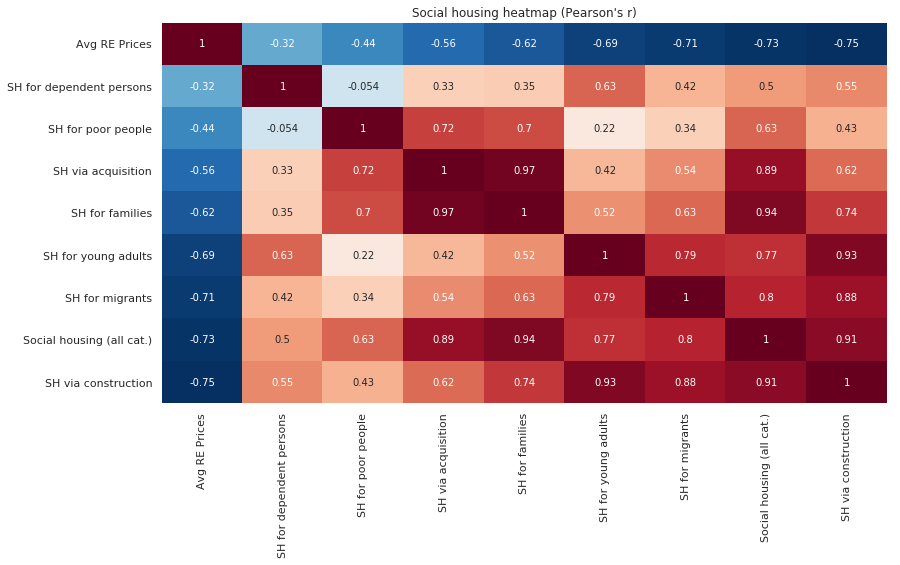

In [88]:
sns.set(rc={'figure.figsize':(13,7)}, font_scale=1)

ax = sns.heatmap(paris_social_housing.corr(), cmap='RdBu_r', annot=True, annot_kws={"size": 10}, cbar=False)
ax.set_title("Social housing heatmap (Pearson's r)")

plt.savefig('social_housing_corr.png', bbox_inches='tight')

plt.show()

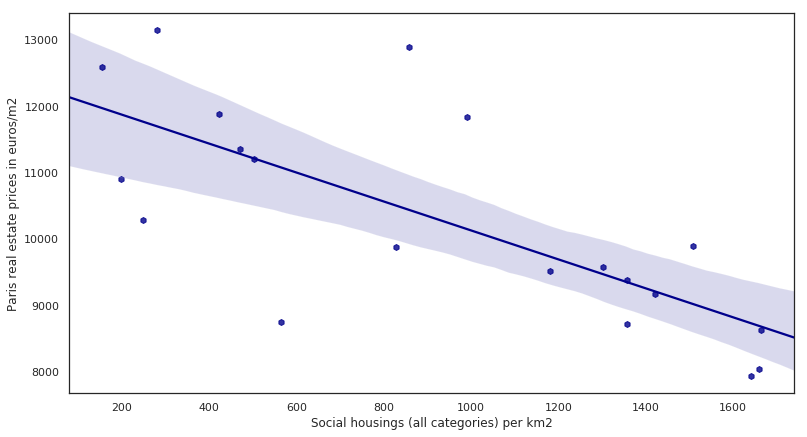

In [100]:
sns.set(style='white', rc={'figure.figsize':(13,7)}, palette="RdBu_r", font_scale=1)

ax = sns.regplot(x = paris_data['Social housing (all cat.)'], y = paris_data['Avg RE Prices'], color='darkblue', marker='h')

ax.set_title('')
ax.set_ylabel('Paris real estate prices in euros/m2')
ax.set_xlabel('Social housings (all categories) per km2')

plt.savefig('social_housing_all_plot.png', bbox_inches='tight')

plt.show()

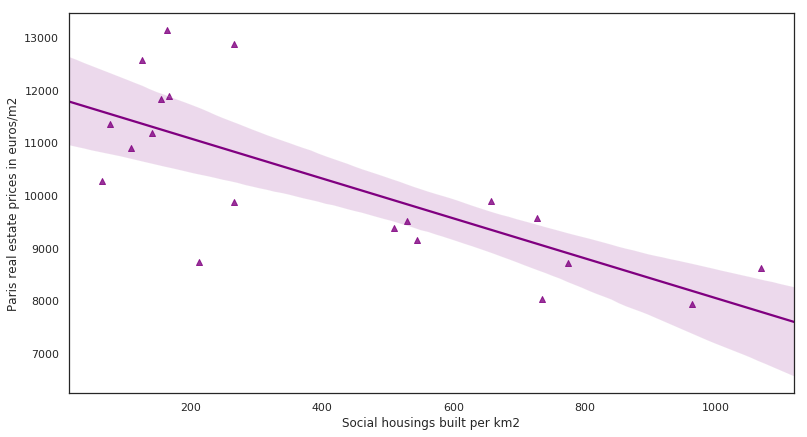

In [98]:
sns.set(style='white', rc={'figure.figsize':(13,7)}, palette="RdBu_r", font_scale=1)

ax = sns.regplot(x = paris_data['SH via construction'], y = paris_data['Avg RE Prices'], color='purple', marker='^')

ax.set_title('')
ax.set_ylabel('Paris real estate prices in euros/m2')
ax.set_xlabel('Social housings built per km2')

plt.savefig('social_housing_built_plot.png', bbox_inches='tight')

plt.show()

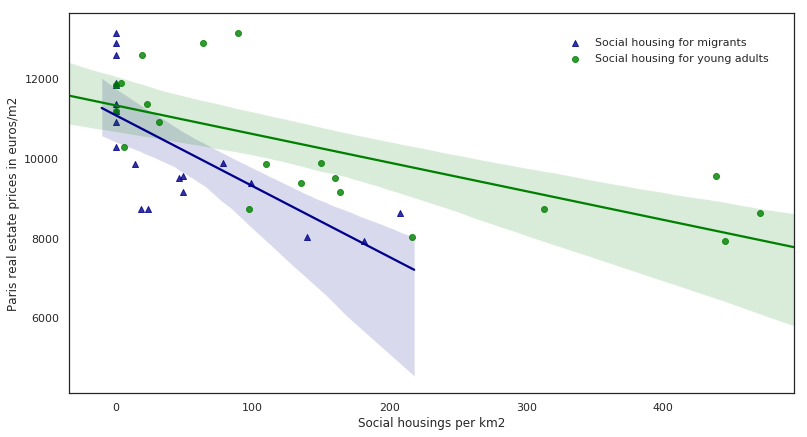

In [101]:
sns.set(style='white', rc={'figure.figsize':(13,7)}, palette="RdBu_r", font_scale=1)

ax = sns.regplot(x = paris_data['SH for migrants'], label='Social housing for migrants', y = paris_data['Avg RE Prices'], color='darkblue', marker = '^')
ax = sns.regplot(x = paris_data['SH for young adults'], label='Social housing for young adults', y = paris_data['Avg RE Prices'], color='green')

ax.legend(frameon=False, loc='upper right', borderaxespad=1.9)

ax.set_title('')
ax.set_ylabel('Paris real estate prices in euros/m2')
ax.set_xlabel('Social housings per km2')

plt.savefig('social_housing_migrants_and_young_plot.png', bbox_inches='tight')

plt.show()

<h4>C. Dig the social housing variable</h4>

In [22]:
# Load the dataset containing the totals by feature (before the calculation of density per km2)

paris_totals = pd.read_csv('paris_multivar_data.csv')

In [23]:
# Calculate correlations between Area, Population as X and Social housing construction as y

pearson_coef, p_value = stats.pearsonr(paris_totals['Area'], paris_totals['SH via construction'])
print("Correlation between borough area and social housing construction: \nR =", pearson_coef.round(4), "with P =", p_value.round(4)) 
print('---')
pearson_coef, p_value = stats.pearsonr(paris_totals['SH via construction'], paris_totals['Population'])
print("Correlation between borough population and social housing construction: \nR =", pearson_coef.round(4), "with P =", p_value.round(4)) 

Correlation between borough area and social housing construction: 
R = 0.4258 with P = 0.0612
---
Correlation between borough population and social housing construction: 
R = 0.845 with P = 0.0


In [12]:
# Calculate correlations between Area, Population as X and Social housing (all categories) as y

pearson_coef, p_value = stats.pearsonr(paris_totals['Area'], paris_totals['Social housing'])
print("Correlation between borough area and social housing (all categories): \nR =", pearson_coef.round(4), "with P =", p_value.round(4)) 

print('---')

# Calculate correlations between Area, Population as X and Social housing (all categories) as y

pearson_coef, p_value = stats.pearsonr(paris_totals['Social housing'], paris_totals['Population'])
print("Correlation between borough population and social housing (all categories): \nR =", pearson_coef.round(4), "with P =", p_value.round(4))

Correlation between borough area and social housing (all categories): 
R = 0.5599 with P = 0.0102
---
Correlation between borough population and social housing (all categories): 
R = 0.9206 with P = 0.0


In [31]:
# Calculate correlations between Social housing for migrants as X and Social housing via construction y

pearson_coef, p_value = stats.pearsonr(paris_data['SH for migrants'], paris_data['SH via construction'])
print("Correlation between social housing for migrants and social housing via construction: \nR =", pearson_coef.round(4), "with P =", p_value.round(4)) 

Correlation between social housing for migrants and social housing via construction: 
R = 0.8754 with P = 0.0


<h2>2.5 Modeling</h2>

### Examining postitive and negative regressors connections

In [102]:
 paris_price_factors = paris_data[['Avg RE Prices',
 'Popular hotels',
 'Popular touristic sites',   
 'Pop. culture & entertainment places',
 'Popular shops & markets',
 'Personal goods',
 'Household goods',
 'Popular restaurants',
 'Courts',
 'Florists',         
 'Books & stationery shops',
 'Law enforcement agencies',
 'Popular bars, pubs & cafés',
 'Private education',
 'Post offices',
 'Higher education',
 'Estate agencies',
 'Local sport facilities',
 'Gas stations',
 'SH via acquisition',
 'Undertakers',
 'SH for families',
 'SH for young adults',
 'SH for migrants',
 'SH via construction']]

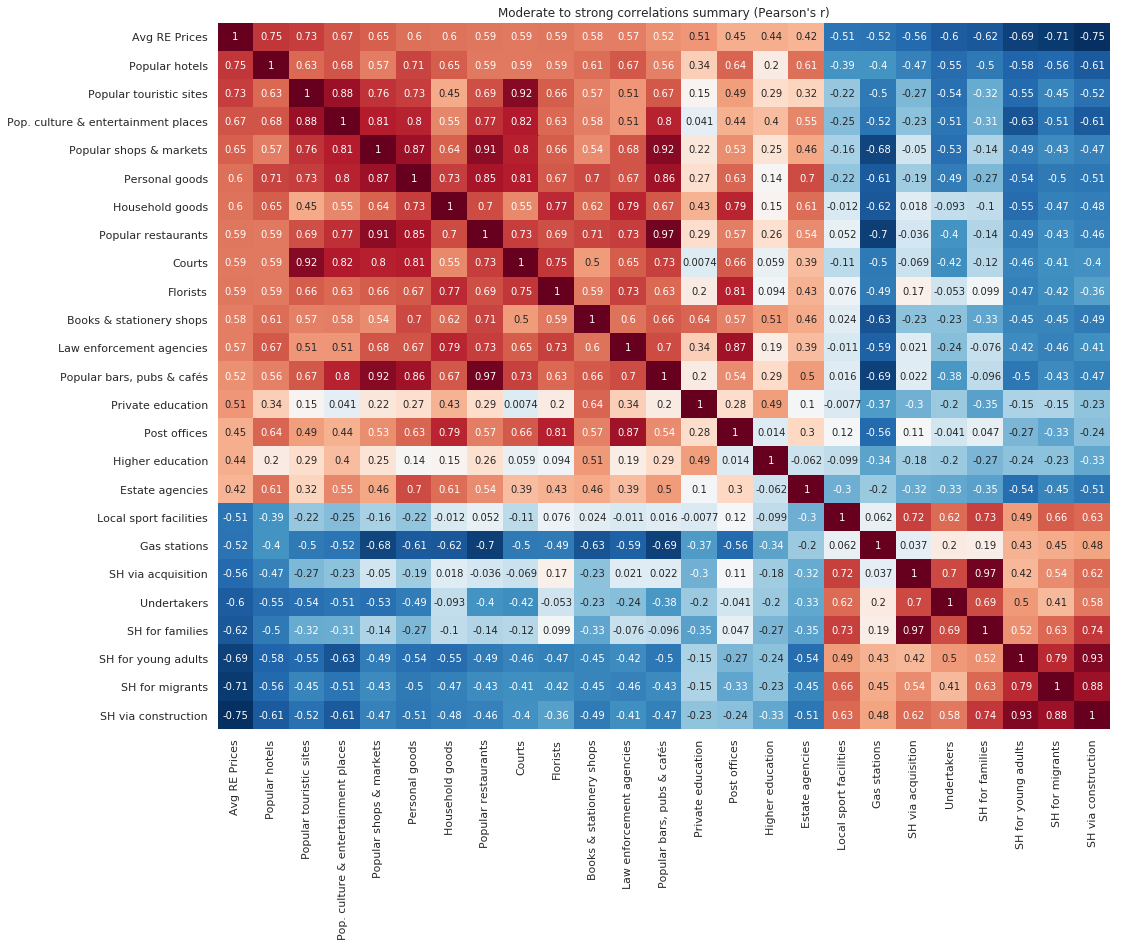

In [104]:
sns.set(rc={'figure.figsize':(16,13)}, font_scale=1)

ax = sns.heatmap(paris_price_factors.corr(), cmap='RdBu_r', annot=True, annot_kws={"size": 10}, cbar=False)
ax.set_title("Moderate to strong correlations summary (Pearson's r)")
plt.savefig('corr_summary.pdf', bbox_inches='tight')
plt.savefig('corr_summary.png', bbox_inches='tight')
plt.show()

In [105]:
 paris_positive_factors = paris_data[['Avg RE Prices',
 'Popular hotels',
 'Popular touristic sites',   
 'Pop. culture & entertainment places',
 'Popular shops & markets',
 'Personal goods',
 'Household goods',
 'Popular restaurants',
 'Courts',
 'Florists',         
 'Books & stationery shops',
 'Law enforcement agencies',
 'Popular bars, pubs & cafés',
 'Private education',
 'Post offices',
 'Higher education',
 'Estate agencies']]

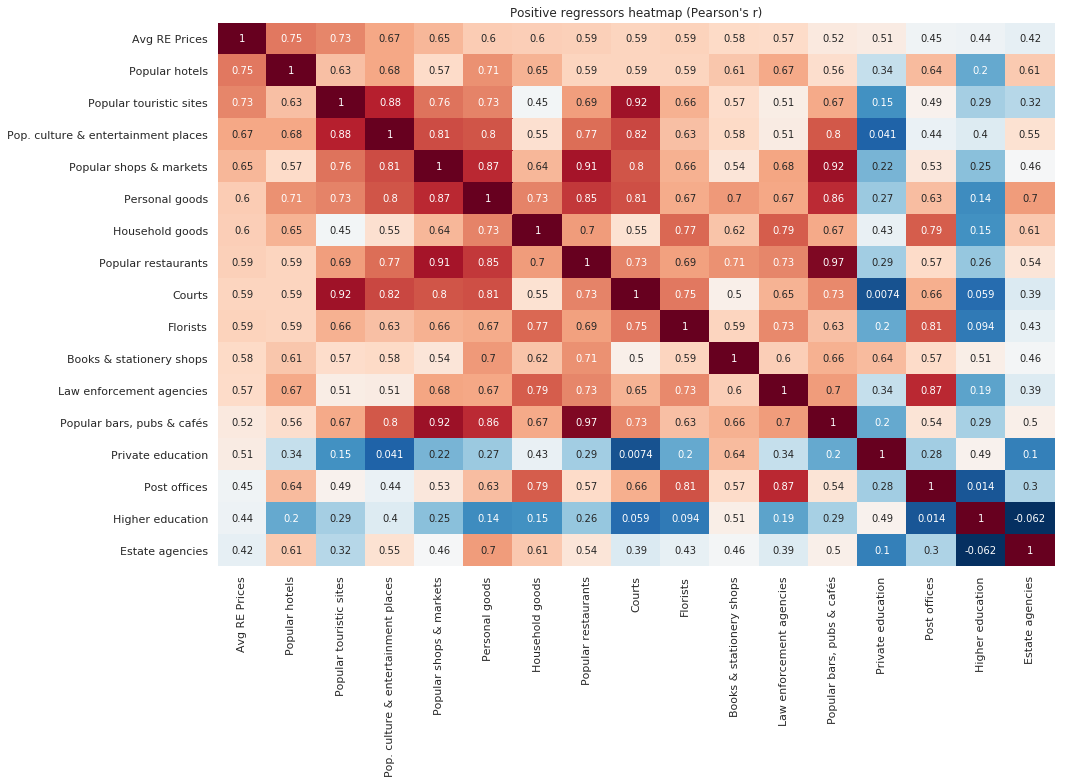

In [106]:
sns.set(rc={'figure.figsize':(15,10)}, font_scale=1)

ax = sns.heatmap(paris_positive_factors.corr(), cmap='RdBu_r', annot=True, annot_kws={"size": 10}, cbar=False)
ax.set_title("Positive regressors heatmap (Pearson's r)")
plt.savefig('positive_regressors.pdf', bbox_inches='tight')
plt.savefig('positive_regressors.png', bbox_inches='tight')
plt.show()

In [107]:
 paris_negative_factors = paris_data[['Avg RE Prices',
'Local sport facilities',
 'Gas stations',
 'SH via acquisition',
 'Undertakers',
 'SH for families',
 'SH for young adults',
 'SH for migrants',
 'SH via construction']]

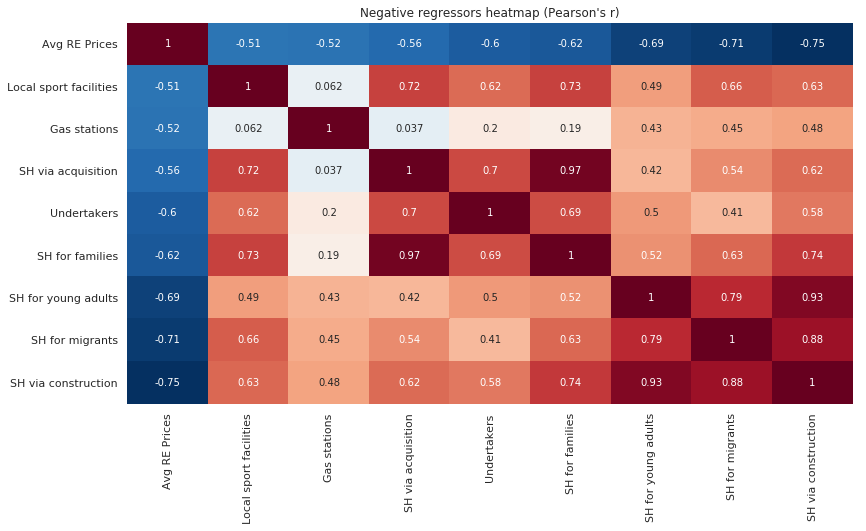

In [108]:
sns.set(rc={'figure.figsize':(13,7)}, font_scale=1)

ax = sns.heatmap(paris_negative_factors.corr(), cmap='RdBu_r', annot=True, annot_kws={"size": 10}, cbar=False)
ax.set_title("Negative regressors heatmap (Pearson's r)")
plt.savefig('negative_regressors.pdf', bbox_inches='tight')
plt.savefig('negative_regressors.png', bbox_inches='tight')
plt.show()

In [16]:
# Calculate correlations between Local sport facilities as X and Social housing as y

pearson_coef, p_value = stats.pearsonr(paris_data['Local sport facilities'], paris_data['SH for families'])
print("Pearson correlation between local sport facilities and social housing for family: \nR =", pearson_coef.round(4), "with P =", p_value.round(4)) 
print('---')
pearson_coef, p_value = stats.pearsonr(paris_data['Local sport facilities'], paris_data['SH via acquisition'])
print("Pearson correlation between local sport facilities and social housing via acquisition: \nR =", pearson_coef.round(4), "with P =", p_value.round(4)) 
print('---')
spearman_coef, p_value = stats.spearmanr(paris_data['Local sport facilities'], paris_data['SH for families'])
print("Spearman correlation between local sport facilities and social housing for family: \nR =", spearman_coef.round(4), "with P =", p_value.round(4)) 
print('---')
spearman_coef, p_value = stats.spearmanr(paris_data['Local sport facilities'], paris_data['SH via acquisition'])
print("Spearman correlation between local sport facilities and social housing via acquisition: \nR =", spearman_coef.round(4), "with P =", p_value.round(4)) 

Pearson correlation between local sport facilities and social housing for family: 
R = 0.7262 with P = 0.0003
---
Pearson correlation between local sport facilities and social housing via acquisition: 
R = 0.7226 with P = 0.0003
---
Spearman correlation between local sport facilities and social housing for family: 
R = 0.7564 with P = 0.0001
---
Spearman correlation between local sport facilities and social housing via acquisition: 
R = 0.7534 with P = 0.0001


### Models

In [ ]:
import pandas as pd
import numpy as np

from scipy import stats

%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import operator

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

> <p><b><i>Table 6. Summary table of the strongest positive correlations</i></b></p>

| Variables | Pearson's r | p value | Spearman's rho | p value |
|---|---|---|---|---|
| Popular accommodation per km2 | 0.75 | 0.0001 | **0.72** | 0.0003 |
| Popular touristic sites per km2 | 0.73 | 0.0003 | **0.7** | 0.0005 |
| Popular culture & entertainment places per km2 | 0.67 | 0.001 | **0.73** | 0.0003
| Popular shops & markets per km2 | 0.65 | 0.002 | **0.64** | 0.002 |
| Personal goods stores per km2 | 0.6 | 0.004 | **0.65** | 0.001 |
| Household goods stores per km2 | 0.6 | 0.005 | **0.6** | 0.005 |
| Popular restaurants per km2 | 0.59 | 0.005 | **0.65** | 0.002 |
| Courts per km2 | 0.59 | 0.006 | **0.64** | 0.002 |
| Florists per km2 | 0.59 | 0.006 | 0.55 | 0.01 |
| Books & stationery shops per km2 | 0.58 | 0.008 | **0.64** | 0.002 |
| Law enforcement offices per km2 | 0.57 | 0.008 | 0.58 | 0.007 | 
| Private education establishments per km2 | 0.51 | 0.02 | 0.41 | 0.07 |
| Popular bars, pubs & cafés per km2 | 0.5 | 0.02 | 0.52 | 0.02 |
| Higher education establishments per km2 | 0.44 | 0.05 | 0.59 | 0.006 |
| Post offices per km2 | 0.44 | 0.05 | 0.5 | 0.02 |
| Estate agencies per km2 | 0.42 | 0.06 | **0.64** | 0.002 |
| Banks per km2 | 0.28 | 0.2 | 0.59 | 0.006 |

> <p><b><i>Table 7. Summary table of moderate to strong negative correlations</i></b></p>

| Variables | Pearson's r | p | Spearman's rho | p |
|---|---|---|---|---|
| Social housing construction per km2 | -0.75 | 0.0001 | **-0.74** | 0.0002 |
| Social housing for migrants per km2 | -0.7 | 0.0005 | **-0.86** | 0.0 | 
| Social housing for young adults per km2 | -0.69 | 0.0008 | **-0.8** | 0.0 |
| Social housing for families per km2 | -0.62 | 0.003 | **-0.63** | 0.003 |
| Death care services per km2 | **-0.6** | 0.005 | -0.57 | 0.008 |
| Social housing via acquisition per km2 | -0.55 | 0.01 | -0.56 | 0.009 |
| Gas stations per km2 | -0.52 | 0.02 | -0.49 | 0.02 |
| Local sport facilities per km2 | -0.51 | 0.02 | -0.52 | 0.02 |
| Social housing for poor people per km2 | -0.44 | 0.05 | -0.5 | 0.03 |
| Supermarkets per km2 | -0.43 | 0.06 | -0.44 | 0.05 |
| Building craft per km2 | -0.4 | 0.8 | -0.42 | 0.06 |
| Collective daycare per km2 | -0.32 | 0.2 | -0.45 | 0.05 |
| Social housing for dependent persons per km2 | -0.3 | 0.2 | -0.41 | 0.07 |

### SVM Classifier

In [ ]:
# Features selection  
X = np.array(paris_data[['Popular touristic sites','SH via construction']])

# Target setting  
y = np.array(paris_data['Price class'])

In [ ]:
# Create train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

In [11]:
# Data normalization
X = preprocessing.StandardScaler().fit(X).transform(X)

In [ ]:
from sklearn.svm import SVC  
svclassifier = SVC(kernel='poly', degree=3, gamma='scale')  
svclassifier.fit(X_train, y_train) 
y_pred = svclassifier.predict(X_test)  

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("SVC accuracy score : ", accuracy_score(y_test, y_pred))
print('---')
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  

## <i>3-features model (a)</i>

In [4]:
# Features selection : all var with corr > .7 or < -.7  *** The 3 top correlations
X1 = np.array(paris_data[['Popular hotels','Popular touristic sites','SH via construction']])

# Target setting  
y1 = np.array(paris_data['Avg RE Prices'])

In [5]:
# Create train & test sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.25, random_state=5)

In [6]:
# Data normalization
X1 = preprocessing.StandardScaler().fit(X1).transform(X1)

#### A. Multilinear Regression model

In [7]:
# Fit the features to Linear Regression

lm1 = LinearRegression()
lm1.fit(X1_train, y1_train)
  
# Predict on training dataset

yhat1_train = lm1.predict(X1_train)
  
# Predict on test dataset

yhat1 = lm1.predict(X1_test)
  
# Evaluate the model on training dataset

RMSEtrain1 = np.sqrt(mean_squared_error(y1_train, yhat1_train))
R2train1 = r2_score(y1_train, yhat1_train)
R2adj_train1 = 1 - (1-R2train1)*(len(y1_train)-1)/(len(y1_train)-X1_train.shape[1]-1)

# Evaluate the model on test dataset

RMSEtest1 = np.sqrt(mean_squared_error(y1_test, yhat1))
R2test1 = r2_score(y1_test, yhat1)
R2adj_test1 = 1 - (1-R2test1)*(len(y1_test)-1)/(len(y1_test)-X1_test.shape[1]-1)

# Display metrics

print("Train performance")
print("-------------------------------------------")
print("RMSE: {}".format(RMSEtrain1))
print('Mean Absolute Error:', metrics.mean_absolute_error(y1_train, yhat1_train)) 
print("R2: {}".format(R2train1))
print("R2 adj: {}".format(R2adj_train1))  
print("\n")
  
print("Test performance")
print("-------------------------------------------")
print("RMSE: {}".format(RMSEtest1))
print('Mean Absolute Error:', metrics.mean_absolute_error(y1_test, yhat1)) 
print("R2: {}".format(R2test1))
print("R2 adj: {}".format(R2adj_test1))  

Train performance
-------------------------------------------
RMSE: 836.7857881350086
Mean Absolute Error: 694.0770703464749
R2: 0.6902781028432305
R2 adj: 0.605808494527748


Test performance
-------------------------------------------
RMSE: 538.0782266016054
Mean Absolute Error: 430.4381056502349
R2: 0.9031660198509642
R2 adj: 0.6126640794038569


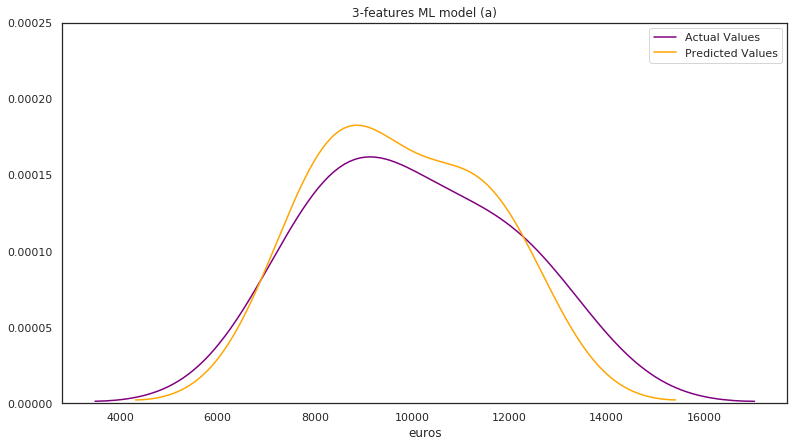

In [117]:
plt.figure(figsize=(13, 7))

ax1 = sns.distplot(y1_test, hist=False, color="purple", label="Actual Values")
sns.distplot(yhat1, hist=False, color="orange", label="Predicted Values", ax=ax1)

sns.set(style='white')
plt.ylim(0.0, 0.00025)

plt.title("3-features ML model (a)")
plt.xlabel('euros')
plt.ylabel('')

plt.savefig('3features_a_ML.png', bbox_inches='tight')

plt.show()

#### B. Random Forest model

In [46]:
# Implement Random Forest

rf = RandomForestRegressor(n_estimators=20, random_state=0)  
rf.fit(X1_train, y1_train)  

y1_train_pred = rf.predict(X1_train)  
R2rfTrain1 = r2_score(y1_train, y1_train_pred)
R2rfadj_train = 1 - (1-R2rfTrain1)*(len(y1_train)-1)/(len(y1_train)-X1_train.shape[1]-1)

y1_pred = regressor.predict(X1_test)  
R2rfTest1 = r2_score(y1_test, y1_pred)
R2rfadj_test = 1 - (1-R2rfTest1)*(len(y1_test)-1)/(len(y1_test)-X1_test.shape[1]-1)

In [47]:
# Display Random Forest scores

print('Train performance')
print('---')
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y1_train, y1_train_pred))) 
print('Mean Absolute Error:', metrics.mean_absolute_error(y1_train, y1_train_pred))  
print('R2:', r2_score(y1_train, y1_train_pred))
print("R2 adj:{}".format(R2rfadj_train))

print('\n')

print('Test performance')
print('---')
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y1_test, y1_pred))) 
print('Mean Absolute Error:', metrics.mean_absolute_error(y1_test, y1_pred))  
print('R2:', r2_score(y1_test, y1_pred))
print("R2 adj:{}".format(R2rfadj_test))

Train performance
---
Root Mean Squared Error: 409.66101840424113
Mean Absolute Error: 333.03333333333336
R2: 0.9257677541158024
R2 adj:0.9055225961473848


Test performance
---
Root Mean Squared Error: 554.538231324045
Mean Absolute Error: 415.1
R2: 0.8971510335979537
R2 adj:0.5886041343918147


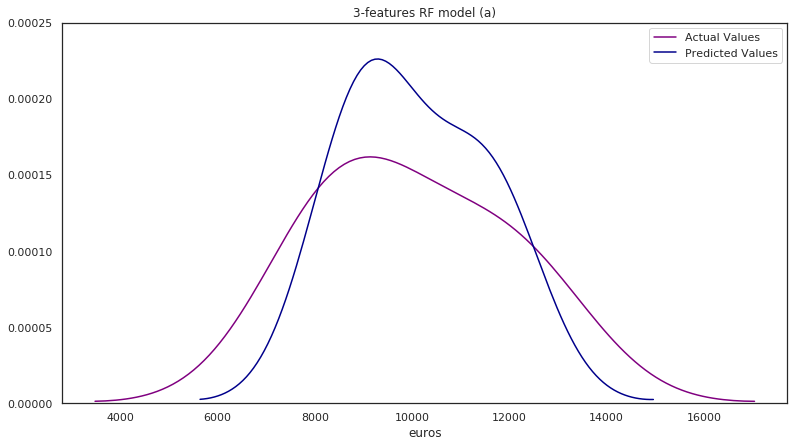

In [121]:
plt.figure(figsize=(13, 7))

ax1 = sns.distplot(y1_test, hist=False, color="purple", label="Actual Values")
sns.distplot(y1_pred, hist=False, color="darkblue", label="Predicted Values", ax=ax1)

sns.set(style='white')
plt.ylim(0.0, 0.00025)

plt.title("3-features RF model (a)")
plt.xlabel('euros')
plt.ylabel('')

plt.savefig('3features_a_RF.png', bbox_inches='tight')

plt.show()

## <i>3-features model (b)</i>

In [48]:
# Features selection : all var with corr > .7 or < -.7  *** Replace SH via construction by SH for migrants

X1b = np.array(paris_data[['Popular hotels','Popular touristic sites','SH for migrants']])

# Target setting  

y1b = np.array(paris_data['Avg RE Prices'])

In [49]:
# Create train & test sets

X1b_train, X1b_test, y1b_train, y1b_test = train_test_split(X1b, y1b, test_size=0.25, random_state=5)

In [50]:
# Data normalization

X1b = preprocessing.StandardScaler().fit(X1b).transform(X1b)

#### A. Multilinear Regression model

In [93]:
# Fit the features to Linear Regression

lm1b = LinearRegression()
lm1b.fit(X1b_train, y1b_train)
  
# Predict on training dataset

yhat1b_train = lm1b.predict(X1b_train)
  
# Predict on test dataset

yhat1b = lm1b.predict(X1b_test)
  
# Evaluate the model on training dataset

RMSEtrain1b = np.sqrt(mean_squared_error(y1b_train, yhat1b_train))
R2train1b = r2_score(y1b_train, yhat1b_train)
R2adj_train1b = 1 - (1-R2train1b)*(len(y1b_train)-1)/(len(y1b_train)-X1b_train.shape[1]-1)

# Evaluate the model on test dataset

RMSEtest1b = np.sqrt(mean_squared_error(y1b_test, yhat1b))
R2test1b = r2_score(y1b_test, yhat1b)
R2adj_test1b = 1 - (1-R2test1b)*(len(y1b_test)-1)/(len(y1b_test)-X1b_test.shape[1]-1)

# Display metrics

print("Train performance")
print("-------------------------------------------")
print("RMSE: {}".format(RMSEtrain1b))
print('Mean Absolute Error:', metrics.mean_absolute_error(y1b_train, yhat1b_train)) 
print("R2: {}".format(R2train1b))
print("R2 adjusted: {}".format(R2adj_train1b))

print("\n")
  
print("Test performance")
print("-------------------------------------------")
print("RMSE: {}".format(RMSEtest1b))
print('Mean Absolute Error:', metrics.mean_absolute_error(y1b_test, yhat1b)) 
print("R2: {}".format(R2test1b))
print("R2 adjusted: {}".format(R2adj_test1b))

Train performance
-------------------------------------------
RMSE: 808.610024165814
Mean Absolute Error: 705.5980054758704
R2: 0.710784502054316
R2 adjusted: 0.6319075480691294


Test performance
-------------------------------------------
RMSE: 828.9775802923639
Mean Absolute Error: 598.9786052414256
R2: 0.7701616389379257
R2 adjusted: 0.08064655575170265


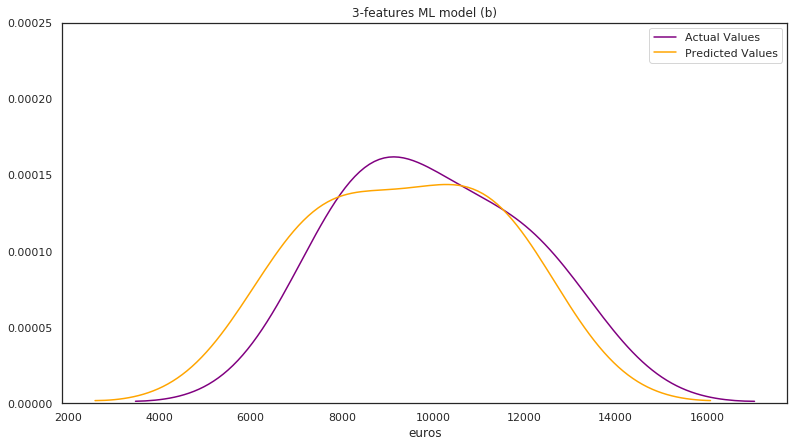

In [127]:
plt.figure(figsize=(13, 7))

ax1 = sns.distplot(y1b_test, hist=False, color="purple", label="Actual Values")
sns.distplot(yhat1b, hist=False, color="orange", label="Predicted Values", ax=ax1)

sns.set(style='white')
plt.ylim(0.0, 0.00025)

plt.title("3-features ML model (b)")
plt.xlabel('euros')
plt.ylabel('')

plt.savefig('3features_b_ML.png', bbox_inches='tight')

plt.show()

#### B. Random Forest model

In [70]:
# Implement Random Forest

regressor = RandomForestRegressor(n_estimators=20, random_state=0)  
regressor.fit(X1b_train, y1b_train)  

y1b_train_pred = regressor.predict(X1b_train)  
R2rfTrain1b = r2_score(y1b_train, y1b_train_pred)
R2rfadj_train1b = 1 - (1-R2rfTrain1b)*(len(y1b_train)-1)/(len(y1b_train)-X1b_train.shape[1]-1)

y1b_pred = regressor.predict(X1b_test)  
R2rfTest1b = r2_score(y1b_test, y1b_pred)
R2rfadj_test1b = 1 - (1-R2rfTest1b)*(len(y1b_test)-1)/(len(y1b_test)-X1b_test.shape[1]-1)

In [71]:
# Display Random Forest scores

print('Train performance')
print('---')
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y1b_train, y1b_train_pred))) 
print('Mean Absolute Error:', metrics.mean_absolute_error(y1b_train, y1b_train_pred))  
print('R2:', r2_score(y1b_train, y1b_train_pred))
print("R2 adjusted: {}".format(R2rfadj_train1b))

print('\n')

print('Test performance')
print('---')
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y1b_test, y1b_pred))) 
print('Mean Absolute Error:', metrics.mean_absolute_error(y1b_test, y1b_pred))  
print('R2:', r2_score(y1b_test, y1b_pred))
print("R2 adjusted: {}".format(R2rfadj_test1b))

Train performance
---
Root Mean Squared Error: 324.192124107501
Mean Absolute Error: 283.8666666666667
R2: 0.9535112103321265
R2 adjusted: 0.9408324495136156


Test performance
---
Root Mean Squared Error: 519.8705127240821
Mean Absolute Error: 310.1
R2: 0.909608557886034
R2 adjusted: 0.638434231544136


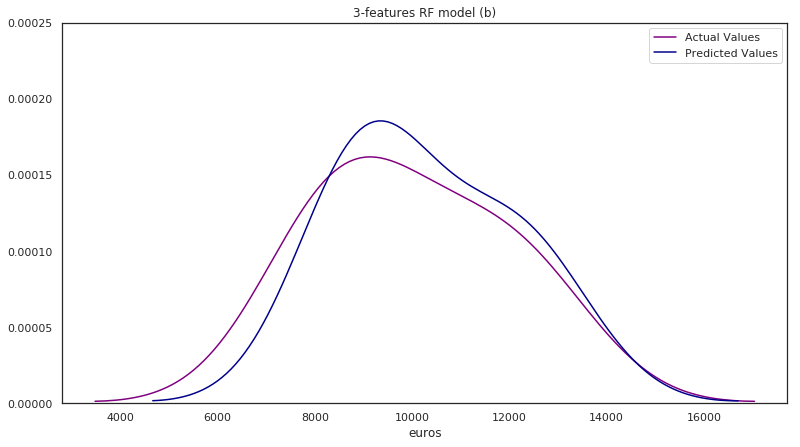

In [131]:
plt.figure(figsize=(13, 7))

ax1 = sns.distplot(y1b_test, hist=False, color="purple", label="Actual Values")
sns.distplot(y1b_pred, hist=False, color="darkblue", label="Predicted Values", ax=ax1)

sns.set(style='white')
plt.ylim(0.0, 0.00025)

plt.title("3-features RF model (b)")
plt.xlabel('euros')
plt.ylabel('')

plt.savefig('3features_b_RF.png', bbox_inches='tight')

plt.show()

## <i>3-features model (c)</i>

In [57]:
# Features selection : all var with corr > .6 or < -.6  *** Replace Popular hotels by Popular culture and entertainment places

X1c = np.array(paris_data[['Pop. culture & entertainment places','Popular touristic sites','SH for migrants']])

# Target setting  

y1c = np.array(paris_data['Avg RE Prices'])

In [58]:
# Create train & test sets

X1c_train, X1c_test, y1c_train, y1c_test = train_test_split(X1c, y1c, test_size=0.25, random_state=5)

In [59]:
# Data normalization

X1c = preprocessing.StandardScaler().fit(X1c).transform(X1c)

#### A. Multilinear Regression model

In [60]:
# Fit the features to Linear Regression

lm1c = LinearRegression()
lm1c.fit(X1c_train, y1c_train)
  
# Predict on training dataset

yhat1c_train = lm1c.predict(X1c_train)
  
# Predict on test dataset

yhat1c = lm1c.predict(X1c_test)
  
# Evaluate the model on training dataset

RMSEtrain1c = np.sqrt(mean_squared_error(y1c_train, yhat1c_train))
R2train1c = r2_score(y1c_train, yhat1c_train)
R2adj_train1c = 1 - (1-R2train1c)*(len(y1c_train)-1)/(len(y1c_train)-X1c_train.shape[1]-1)

# Evaluate the model on test dataset

RMSEtest1c = np.sqrt(mean_squared_error(y1c_test, yhat1c))
R2test1c = r2_score(y1c_test, yhat1c)
R2adj_test1c = 1 - (1-R2test1c)*(len(y1c_test)-1)/(len(y1c_test)-X1c_test.shape[1]-1)

# Display metrics

print("Train performance")
print("-------------------------------------------")
print("RMSE: {}".format(RMSEtrain1c))
print('Mean Absolute Error:', metrics.mean_absolute_error(y1c_train, yhat1c_train)) 
print("R2: {}".format(R2train1c))
print("R2 adjusted: {}".format(R2adj_train1c))

print("\n")
  
print("Test performance")
print("-------------------------------------------")
print("RMSE: {}".format(RMSEtest1c))
print('Mean Absolute Error:', metrics.mean_absolute_error(y1c_test, yhat1c)) 
print("R2: {}".format(R2test1c))
print("R2 adjusted: {}".format(R2adj_test1c))

Train performance
-------------------------------------------
RMSE: 837.0341816282375
Mean Absolute Error: 701.5508204581562
R2: 0.6900941983756145
R2 adjusted: 0.6055744342962366


Test performance
-------------------------------------------
RMSE: 1045.140591603528
Mean Absolute Error: 791.5068342879588
R2: 0.6346691255028949
R2 adjusted: -0.46132349798842043


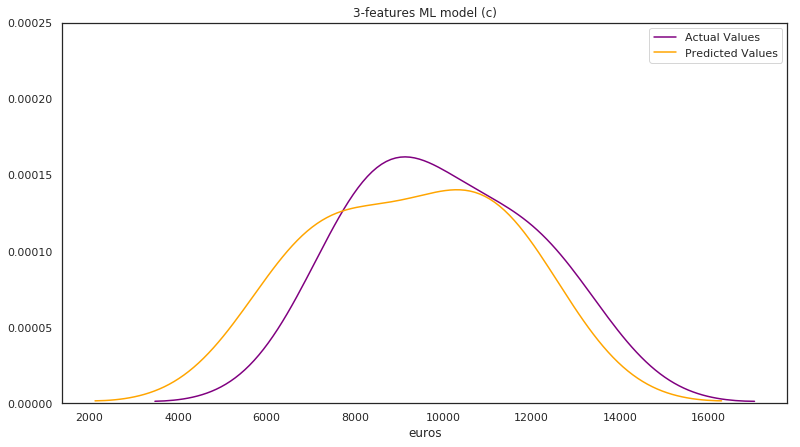

In [137]:
plt.figure(figsize=(13, 7))

ax1 = sns.distplot(y1c_test, hist=False, color="purple", label="Actual Values")
sns.distplot(yhat1c, hist=False, color="orange", label="Predicted Values", ax=ax1)

sns.set(style='white')
plt.ylim(0.0, 0.00025)

plt.title("3-features ML model (c)")
plt.xlabel('euros')
plt.ylabel('')

plt.savefig('3features_c_ML.png', bbox_inches='tight')

plt.show()

#### B. Random Forest model

In [73]:
# Implement Random Forest

regressor = RandomForestRegressor(n_estimators=20, random_state=0)  
regressor.fit(X1c_train, y1c_train) 

y1c_train_pred = regressor.predict(X1c_train) 
R2rfTrain1c = r2_score(y1c_train, y1c_train_pred)
R2rfadj_train1c = 1 - (1-R2rfTrain1c)*(len(y1c_train)-1)/(len(y1c_train)-X1c_train.shape[1]-1)

y1c_pred = regressor.predict(X1c_test)  
R2rfTest1c = r2_score(y1c_test, y1c_pred)
R2rfadj_test1c = 1 - (1-R2rfTest1c)*(len(y1c_test)-1)/(len(y1c_test)-X1c_test.shape[1]-1)

In [74]:
# Display Random Forest scores

print('Train performance')
print('---')
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y1c_train, y1c_train_pred))) 
print('Mean Absolute Error:', metrics.mean_absolute_error(y1c_train, y1c_train_pred))  
print('R2:', r2_score(y1c_train, y1c_train_pred))
print("R2 adjusted: {}".format(R2rfadj_train1c))

print('\n')

print('Test performance')
print('---')
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y1c_test, y1c_pred))) 
print('Mean Absolute Error:', metrics.mean_absolute_error(y1c_test, y1c_pred))  
print('R2:', r2_score(y1c_test, y1c_pred))
print("R2 adjusted: {}".format(R2rfadj_test1c))

Train performance
---
Root Mean Squared Error: 316.3542054933573
Mean Absolute Error: 256.3
R2: 0.9557319344860831
R2 adjusted: 0.9436588257095603


Test performance
---
Root Mean Squared Error: 461.58829057938635
Mean Absolute Error: 339.5
R2: 0.9287398860982011
R2 adjusted: 0.7149595443928045


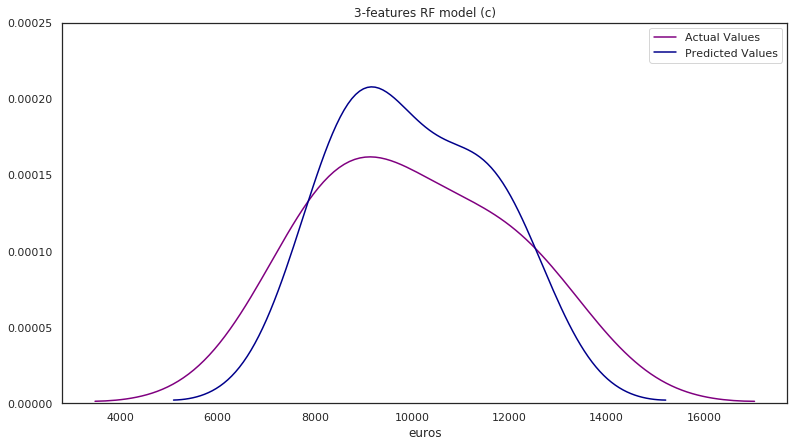

In [141]:
plt.figure(figsize=(13, 7))

ax1 = sns.distplot(y1c_test, hist=False, color="purple", label="Actual Values")
sns.distplot(y1c_pred, hist=False, color="darkblue", label="Predicted Values", ax=ax1)

sns.set(style='white')
plt.ylim(0.0, 0.00025)

plt.title("3-features RF model (c)")
plt.xlabel('euros')
plt.ylabel('')

plt.savefig('3features_c_RF.png', bbox_inches='tight')

plt.show()

## <i>4-features model</i>

In [62]:
# Features selection : Add 'Popular culture & entertainment places'

X2 = np.array(paris_data[['Popular hotels','Popular touristic sites','Pop. culture & entertainment places','SH via construction']])

# Target setting  

y2 = np.array(paris_data['Avg RE Prices'])

In [63]:
# Create train & test sets

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.25, random_state=5)

In [64]:
# Data normalization

X2 = preprocessing.StandardScaler().fit(X2).transform(X2)

#### A. Multilinear Regression model

In [65]:
# Fit the features to Linear Regression

lm2 = LinearRegression()
lm2.fit(X2_train, y2_train)
  
# Predict on training dataset

yhat2_train = lm2.predict(X2_train)
  
# Predict on test dataset

yhat2 = lm2.predict(X2_test)
  
# Evaluate the model on training dataset

RMSEtrain2 = np.sqrt(mean_squared_error(y2_train, yhat2_train))
R2train2 = r2_score(y2_train, yhat2_train)
R2adj_train2 = 1 - (1-R2train2)*(len(y2_train)-1)/(len(y2_train)-X2_train.shape[1]-1)

# Evaluate the model on test dataset

RMSEtest2 = np.sqrt(mean_squared_error(y2_test, yhat2))
R2test2 = r2_score(y2_test, yhat2)
R2adj_test2 = 1 - (1-R2test2)*(len(y2_test)-1)/(len(y2_test)-X2_test.shape[1]-1)

# Display metrics

print("Train performance")
print("-------------------------------------------")
print("RMSE: {}".format(RMSEtrain2))
print('Mean Absolute Error:', metrics.mean_absolute_error(y2_train, yhat2_train)) 
print("R2: {}".format(R2train2))
print("R2 adjusted: {}".format(R2adj_train2))

print("\n")
  
print("Test performance")
print("-------------------------------------------")
print("RMSE: {}".format(RMSEtest2))
print('Mean Absolute Error:', metrics.mean_absolute_error(y2_test, yhat2)) 
print("R2: {}".format(R2test2))
print("R2 adjusted: {}".format(R2adj_test2))

Train performance
-------------------------------------------
RMSE: 815.2404782269467
Mean Absolute Error: 698.4815543787043
R2: 0.7060220278751783
R2 adjusted: 0.5884308390252496


Test performance
-------------------------------------------
RMSE: 407.61208472086247
Mean Absolute Error: 358.49484674490304
R2: 0.9444311961660528
R2 adjusted: -inf


/home/jupyterlab/conda/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in double_scalars


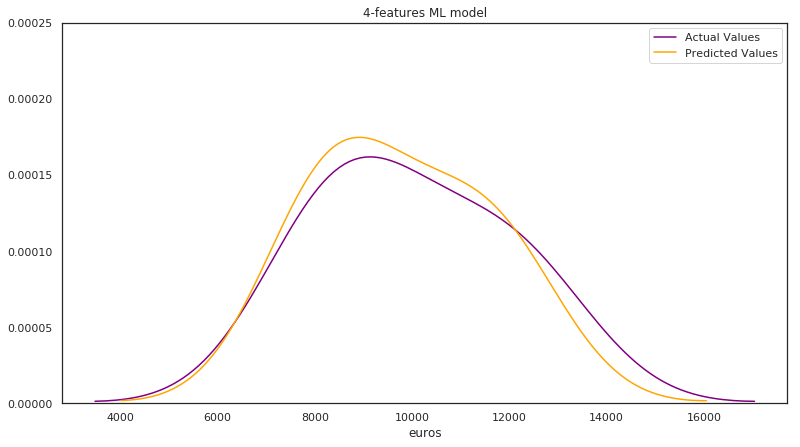

In [156]:
plt.figure(figsize=(13, 7))

ax1 = sns.distplot(y2_test, hist=False, color="purple", label="Actual Values")
sns.distplot(yhat2, hist=False, color="orange", label="Predicted Values", ax=ax1)

sns.set(style='white')
plt.ylim(0.0, 0.00025)

plt.title("4-features ML model")
plt.xlabel('euros')
plt.ylabel('')

plt.savefig('4features_ML.png', bbox_inches='tight')

plt.show()

<hr>

In [98]:
# Display the intercept and coefficients of the 4-features model 

print ('Intercept: ', lm2.intercept_)
print ('Coefficients: ', lm2.coef_)

Intercept:  10267.366227802184
Coefficients:  [ 274.6615834   387.33207966 -286.74665737   -2.2628934 ]


<hr>

#### B. Random Forest model

In [76]:
# Implement Random Forest

regressor = RandomForestRegressor(n_estimators=20, random_state=0)  
regressor.fit(X2_train, y2_train)  

y2_train_pred = regressor.predict(X2_train)  
R2rfTrain2 = r2_score(y2_train, y2_train_pred)
R2rfadj_train2 = 1 - (1-R2rfTrain2)*(len(y2_train)-1)/(len(y2_train)-X2_train.shape[1]-1)

y2_pred = regressor.predict(X2_test)  
R2rfTest2 = r2_score(y2_test, y2_pred)
R2rfadj_test2 = 1 - (1-R2rfTest2)*(len(y2_test)-1)/(len(y2_test)-X2_test.shape[1]-1)

/home/jupyterlab/conda/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  if sys.path[0] == '':


In [78]:
# Display Random Forest scores

print('Train performance')
print('---')
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y2_train, y2_train_pred))) 
print('Mean Absolute Error:', metrics.mean_absolute_error(y2_train, y2_train_pred))  
print('R2:', r2_score(y2_train, y2_train_pred))
print("R2 adjusted: {}".format(R2rfadj_train2))

print('\n')

print('Test performance')
print('---')
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y2_test, y2_pred))) 
print('Mean Absolute Error:', metrics.mean_absolute_error(y2_test, y2_pred))  
print('R2:', r2_score(y2_test, y2_pred))
print("R2 adjusted: {}".format(R2rfadj_test2))

Train performance
---
Root Mean Squared Error: 381.15799436279264
Mean Absolute Error: 299.7
R2: 0.9357381260792775
R2 adjusted: 0.9100333765109886


Test performance
---
Root Mean Squared Error: 729.5787140535283
Mean Absolute Error: 550.4
R2: 0.8219748931752568
R2 adjusted: -inf


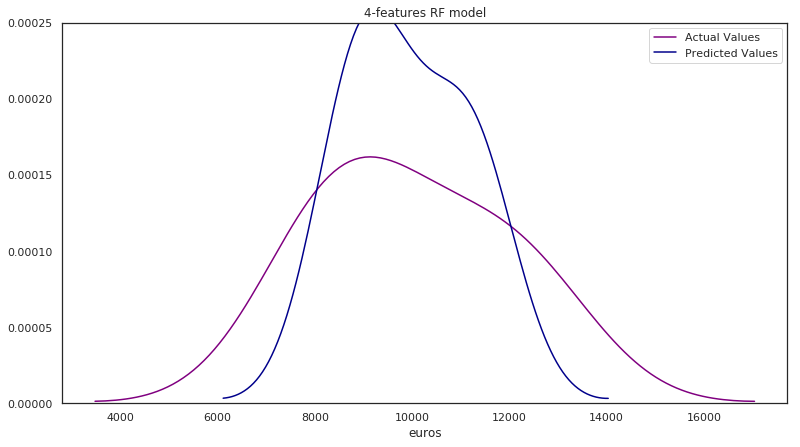

In [160]:
plt.figure(figsize=(13, 7))

ax1 = sns.distplot(y2_test, hist=False, color="purple", label="Actual Values")
sns.distplot(y2_pred, hist=False, color="darkblue", label="Predicted Values", ax=ax1)

sns.set(style='white')
plt.ylim(0.0, 0.00025)

plt.title("4-features RF model")
plt.xlabel('euros')
plt.ylabel('')

plt.savefig('4features_RF.png', bbox_inches='tight')

plt.show()

### <i>2-features model (a)</i>

In [4]:
# Features selection : Add 'Undertakers' 

X3 = np.array(paris_data[['Popular touristic sites','SH for migrants']])

# Target setting  

y3 = np.array(paris_data['Avg RE Prices'])

In [5]:
# Create train & test sets

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.25, random_state=5)

In [6]:
# Data normalization

X3 = preprocessing.StandardScaler().fit(X3).transform(X3)

#### A. Multilinear Regression model

In [7]:
# Fit the features to Linear Regression

lm3 = LinearRegression()
lm3.fit(X3_train, y3_train)
  
# Predict on training dataset

yhat3_train = lm3.predict(X3_train)
  
# Predict on test dataset

yhat3 = lm3.predict(X3_test)
  
# Evaluate the model on training dataset

RMSEtrain3 = np.sqrt(mean_squared_error(y3_train, yhat3_train))
R2train3 = r2_score(y3_train, yhat3_train)
R2adj_train3 = 1 - (1-R2train3)*(len(y3_train)-1)/(len(y3_train)-X3_train.shape[1]-1)

# Evaluate the model on test dataset

RMSEtest3 = np.sqrt(mean_squared_error(y3_test, yhat3))
R2test3 = r2_score(y3_test, yhat3)
R2adj_test3 = 1 - (1-R2test3)*(len(y3_test)-1)/(len(y3_test)-X3_test.shape[1]-1)

# Display metrics

print("Train performance")
print("-------------------------------------------")
print("RMSE: {}".format(RMSEtrain3))
print('Mean Absolute Error:', metrics.mean_absolute_error(y3_train, yhat3_train)) 
print("R2: {}".format(R2train3))
print("R2 adjusted: {}".format(R2adj_train3))

print("\n")
  
print("Test performance")
print("-------------------------------------------")
print("RMSE: {}".format(RMSEtest3))
print('Mean Absolute Error:', metrics.mean_absolute_error(y3_test, yhat3)) 
print("R2: {}".format(R2test3))
print("R2 adjusted: {}".format(R2adj_test3))

Train performance
-------------------------------------------
RMSE: 837.4269154936503
Mean Absolute Error: 700.563003795014
R2: 0.6898033164519013
R2 adjusted: 0.6381038691938847


Test performance
-------------------------------------------
RMSE: 1044.6990822908895
Mean Absolute Error: 792.0066930805627
R2: 0.6349777211414573
R2 adjusted: 0.2699554422829147


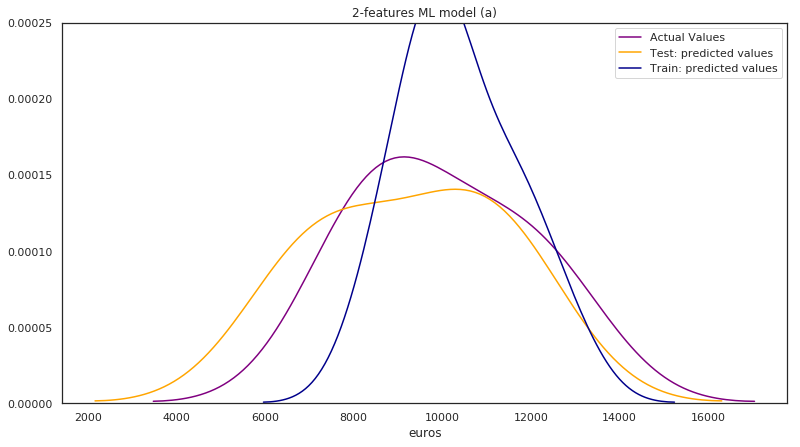

In [9]:
plt.figure(figsize=(13, 7))

ax1 = sns.distplot(y3_test, hist=False, color="purple", label="Actual Values")
sns.distplot(yhat3, hist=False, color="orange", label="Test: predicted values", ax=ax1)
sns.distplot(yhat3_train, hist=False, color="darkblue", label="Train: predicted values", ax=ax1)

sns.set(style='white')
plt.ylim(0.0, 0.00025)

    
plt.title("2-features ML model (a)")
plt.xlabel('euros')
plt.ylabel('')

plt.savefig('2featuresa_ML.png', bbox_inches='tight')

plt.show()

#### B. Random Forest model

In [10]:
# Implement Random Forest

regressor = RandomForestRegressor(n_estimators=20, random_state=0)  
regressor.fit(X3_train, y3_train)  

y3_train_pred = regressor.predict(X3_train)  
R2rfTrain3 = r2_score(y3_train, y3_train_pred)
R2rfadj_train3 = 1 - (1-R2rfTrain3)*(len(y3_train)-1)/(len(y3_train)-X3_train.shape[1]-1)

y3_pred = regressor.predict(X3_test)  
R2rfTest3 = r2_score(y3_test, y3_pred)
R2rfadj_test3 = 1 - (1-R2rfTest3)*(len(y3_test)-1)/(len(y3_test)-X3_test.shape[1]-1)

In [11]:
# Display Random Forest scores

print('Train performance')
print('---')
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y3_train, y3_train_pred))) 
print('Mean Absolute Error:', metrics.mean_absolute_error(y3_train, y3_train_pred))  
print('R2:', r2_score(y3_train, y3_train_pred))
print("R2 adjusted: {}".format(R2rfadj_train3))

print('\n')

print('Test performance')
print('---')
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y3_test, y3_pred))) 
print('Mean Absolute Error:', metrics.mean_absolute_error(y3_test, y3_pred))  
print('R2:', r2_score(y3_test, y3_pred))
print("R2 adjusted: {}".format(R2rfadj_test3))

Train performance
---
Root Mean Squared Error: 347.118879732386
Mean Absolute Error: 303.03333333333336
R2: 0.9467033648886044
R2 adjusted: 0.9378205923700385


Test performance
---
Root Mean Squared Error: 503.53128006112985
Mean Absolute Error: 395.9
R2: 0.9152011709918313
R2 adjusted: 0.8304023419836626


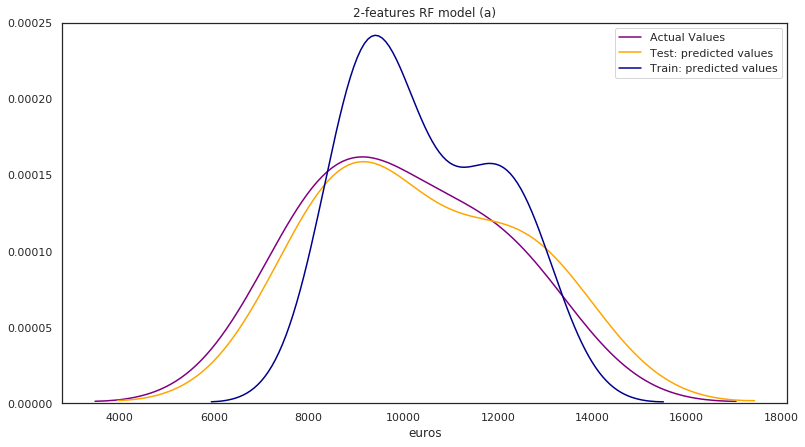

In [15]:
plt.figure(figsize=(13, 7))
sns.set(style='white')

ax1 = sns.distplot(y3_test, hist=False, color="purple", label="Actual Values")
ax2=sns.distplot(y3_pred, hist=False, color="orange", label="Test: predicted values")
ax3=sns.distplot(y3_train_pred, hist=False, color="darkblue", label="Train: predicted values")

sns.set(style='white')
plt.ylim(0.0, 0.00025)

plt.title("2-features RF model (a)")
plt.xlabel('euros')
plt.ylabel('')

plt.savefig('2featuresa_RF.png', bbox_inches='tight')

plt.show()

### <i>2-features model (b)</i>

In [16]:
# Features selection : Add 'Undertakers' 

X4 = np.array(paris_data[['Popular hotels','SH via construction']])

# Target setting  

y4 = np.array(paris_data['Avg RE Prices'])

In [17]:
# Create train & test sets

X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.25, random_state=5)

In [18]:
# Data normalization

X4 = preprocessing.StandardScaler().fit(X3).transform(X3)

#### A. Multilinear Regression model

In [19]:
# Fit the features to Linear Regression

lm4 = LinearRegression()
lm4.fit(X4_train, y4_train)
  
# Predict on training dataset

yhat4_train = lm4.predict(X4_train)
  
# Predict on test dataset

yhat4 = lm4.predict(X4_test)
  
# Evaluate the model on training dataset

RMSEtrain4 = np.sqrt(mean_squared_error(y4_train, yhat4_train))
R2train4 = r2_score(y4_train, yhat4_train)
R2adj_train4 = 1 - (1-R2train4)*(len(y4_train)-1)/(len(y4_train)-X4_train.shape[1]-1)

# Evaluate the model on test dataset

RMSEtest4 = np.sqrt(mean_squared_error(y4_test, yhat4))
R2test4 = r2_score(y4_test, yhat4)
R2adj_test4 = 1 - (1-R2test4)*(len(y4_test)-1)/(len(y4_test)-X4_test.shape[1]-1)

# Display metrics

print("Train performance")
print("-------------------------------------------")
print("RMSE: {}".format(RMSEtrain4))
print('Mean Absolute Error:', metrics.mean_absolute_error(y4_train, yhat4_train)) 
print("R2: {}".format(R2train4))
print("R2 adjusted: {}".format(R2adj_train4))

print("\n")
  
print("Test performance")
print("-------------------------------------------")
print("RMSE: {}".format(RMSEtest4))
print('Mean Absolute Error:', metrics.mean_absolute_error(y4_test, yhat4)) 
print("R2: {}".format(R2test4))
print("R2 adjusted: {}".format(R2adj_test4))

Train performance
-------------------------------------------
RMSE: 966.2239513811764
Mean Absolute Error: 688.3307129111417
R2: 0.5870486242059796
R2 adjusted: 0.5182233949069761


Test performance
-------------------------------------------
RMSE: 448.6072595845896
Mean Absolute Error: 392.88955154660107
R2: 0.9326915576505797
R2 adjusted: 0.8653831153011593


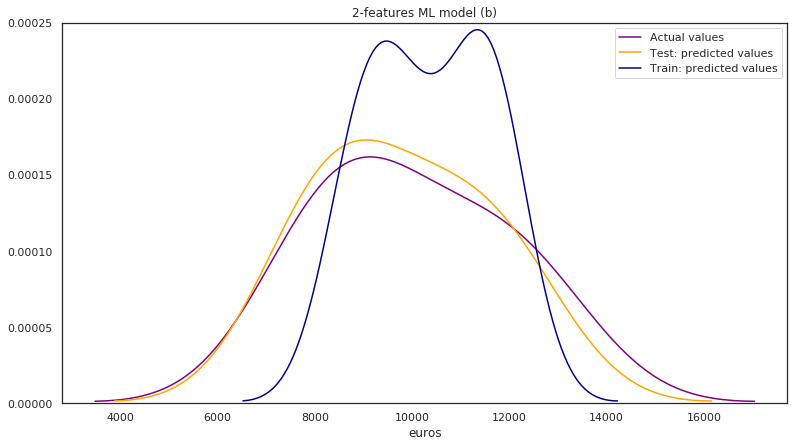

In [21]:
plt.figure(figsize=(13, 7))

ax1 = sns.distplot(y4_test, hist=False, color="purple", label="Actual values")
ax2=sns.distplot(yhat4, hist=False, color="orange", label="Test: predicted values")
ax3=sns.distplot(yhat4_train, hist=False, color="darkblue", label="Train: predicted values")

sns.set(style='white')
plt.ylim(0.0, 0.00025)

    
plt.title("2-features ML model (b)")
plt.xlabel('euros')
plt.ylabel('')

plt.savefig('2featuresb_ML.png', bbox_inches='tight')

plt.show()

#### B. Random Forest model

In [22]:
# Implement Random Forest

regressor = RandomForestRegressor(n_estimators=20, random_state=0)  
regressor.fit(X4_train, y4_train)  

y4_train_pred = regressor.predict(X4_train)  
R2rfTrain4 = r2_score(y4_train, y4_train_pred)
R2rfadj_train4 = 1 - (1-R2rfTrain4)*(len(y4_train)-1)/(len(y4_train)-X4_train.shape[1]-1)

y4_pred = regressor.predict(X4_test)  
R2rfTest4 = r2_score(y4_test, y4_pred)
R2rfadj_test4 = 1 - (1-R2rfTest4)*(len(y4_test)-1)/(len(y4_test)-X4_test.shape[1]-1)

In [23]:
# Display Random Forest scores

print('Train performance')
print('---')
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y4_train, y4_train_pred))) 
print('Mean Absolute Error:', metrics.mean_absolute_error(y4_train, y4_train_pred))  
print('R2:', r2_score(y4_train, y4_train_pred))
print("R2 adjusted: {}".format(R2rfadj_train4))

print('\n')

print('Test performance')
print('---')
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y4_test, y4_pred))) 
print('Mean Absolute Error:', metrics.mean_absolute_error(y4_test, y4_pred))  
print('R2:', r2_score(y4_test, y4_pred))
print("R2 adjusted: {}".format(R2rfadj_test4))

Train performance
---
Root Mean Squared Error: 544.1623838524673
Mean Absolute Error: 395.2
R2: 0.8690213970215871
R2 adjusted: 0.8471916298585183


Test performance
---
Root Mean Squared Error: 836.4405238867854
Mean Absolute Error: 661.1
R2: 0.76600473119229
R2 adjusted: 0.5320094623845799


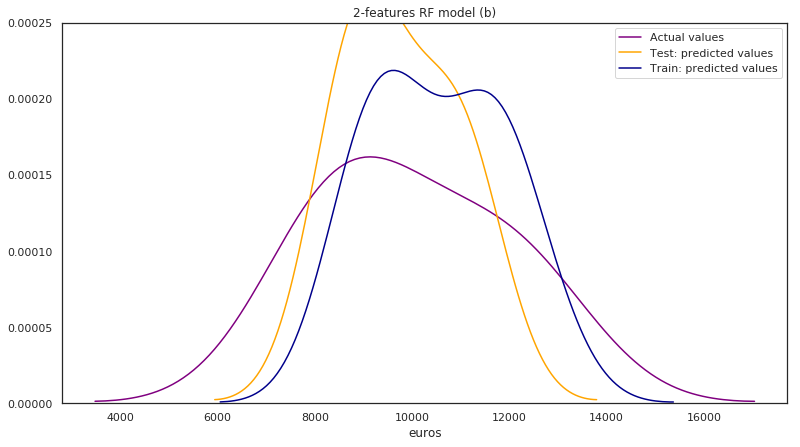

In [27]:
plt.figure(figsize=(13, 7))
sns.set(style='white')

ax1 = sns.distplot(y4_test, hist=False, color="purple", label="Actual values")
ax2=sns.distplot(y4_pred, hist=False, color="orange", label="Test: predicted values")
ax3=sns.distplot(y4_train_pred, hist=False, color="darkblue", label="Train: predicted values")

sns.set(style='white')
plt.ylim(0.0, 0.00025)

plt.title("2-features RF model (b)")
plt.xlabel('euros')
plt.ylabel('')

plt.savefig('2featuresb_RF.png', bbox_inches='tight')

plt.show()

### Classification

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [153]:
from IPython.display import Image  
!conda install python-graphviz --yes
import graphviz
from sklearn.tree import export_graphviz
import pydotplus

Solving environment: done

# All requested packages already installed.



#### 21 features: Social housing and education offering with binary modalities ('construction' vs 'acquisition' ; 'private' vs 'public')

In [14]:
# Features selection

X = paris_data[[
 'Popular hotels',
 'Popular touristic sites',   
 'Pop. culture & entertainment places',
 'Popular shops & markets',
 'Personal goods',
 'Household goods',
 'Popular restaurants',
 'Courts',
 'Florists',         
 'Books & stationery shops',
 'Law enforcement agencies',
 'Popular bars, pubs & cafés',
 'Private education',
 'Post offices',
 'Public education',
 'Estate agencies',
 'Local sport facilities',
 'Gas stations',
 'SH via acquisition',
 'Undertakers',
 'SH via construction']]

# Target setting  

y = paris_data['Price class'].values

In [263]:
# Create train & test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=5)

In [264]:
# Data normalization

X = preprocessing.StandardScaler().fit(X).transform(X)

In [266]:
DT = DecisionTreeClassifier(criterion="entropy", max_depth = 5).fit(X_train,y_train)

yhatDT = DT.predict(X_test)

print('Decision Tree Jaccard:',jaccard_similarity_score(y_test, yhatDT))
print("Decision Tree F1:",f1_score(y_test, yhatDT, average='weighted',labels=np.unique(yhatDT)))

Decision Tree Jaccard: 0.8
Decision Tree F1: 0.7904761904761904


In [267]:
# Define labels

features = [
 'Popular hotels',
 'Popular touristic sites',   
 'Pop. culture & entertainment places',
 'Popular shops & markets',
 'Personal goods',
 'Household goods',
 'Popular restaurants',
 'Courts',
 'Florists',         
 'Books & stationery shops',
 'Law enforcement agencies',
 'Popular bars, pubs & cafés',
 'Private education',
 'Post offices',
 'Public education',
 'Estate agencies',
 'Local sport facilities',
 'Gas stations',
 'SH via acquisition',
 'Undertakers',
 'SH via construction']

price = ['price < 9k','price 9k-10k','price 10k-11.5k','price > 11.5k']

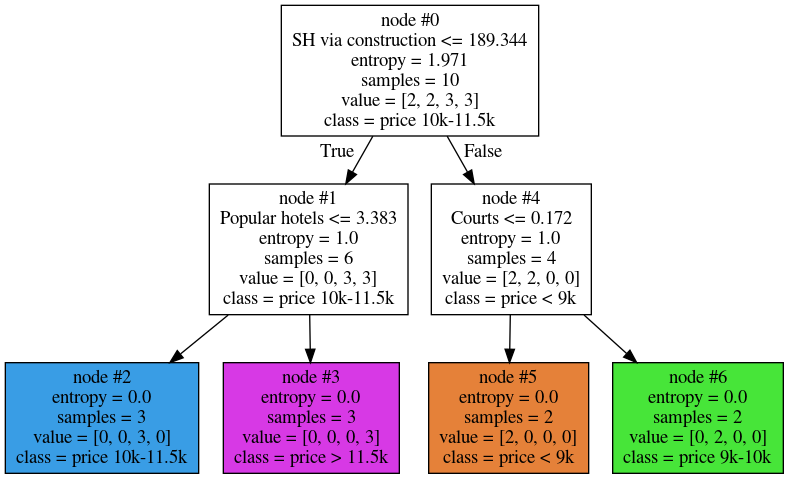

In [488]:
from sklearn.externals.six import StringIO 

dot_data = StringIO()

export_graphviz(DT,
                feature_names=features,
                out_file=dot_data,
                class_names=price,
                filled=True,
                node_ids=True,
                special_characters=False,
                impurity=True,
                label='all',
                leaves_parallel=False)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [ ]:
export_graphviz(DT,
                feature_names=features,
                out_file="DT_paris.dot",
                class_names=price,
                filled=True,
                node_ids=True,
                special_characters=False,
                impurity=False,
                label='all',
                leaves_parallel=True)

with open("DT_paris.dot") as paris_tree_image:
    paris_tree_graph = paris_tree_image.read()
graphviz.Source(paris_tree_graph)

In [ ]:
RF = RandomForestClassifier(n_estimators=200, random_state=200, criterion='entropy')

RF.fit(X_train, y_train)
yhatRF = RF.predict(X_test)

print("Random Forest Classifier accuracy score : ", accuracy_score(y_test, yhatRF))
print('---')
print("Random Forest Classifier confusion matrix :")
print(confusion_matrix(y_test,yhatRF))  
print('---')
print("Random Forest Classifier report :")
print(classification_report(y_test, yhatRF))

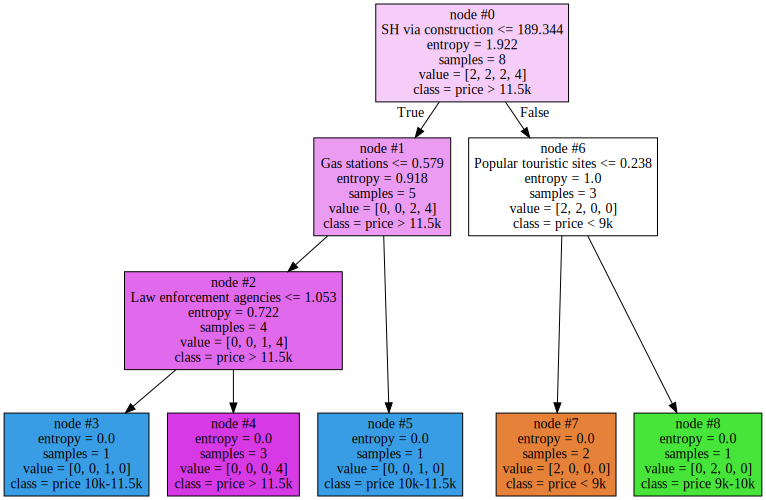

In [489]:
estimator = RF.estimators_[5]

export_graphviz(estimator,
                feature_names=features,
                out_file="RF_paris.dot",
                class_names=price,
                filled=True,
                node_ids=True,
                special_characters=False,
                impurity=True,
                label='all',
                leaves_parallel=True)

with open("RF_paris.dot") as parisRF_tree_image:
    parisRF_tree_graph = parisRF_tree_image.read()
graphviz.Source(parisRF_tree_graph)

In [249]:
feature_imp = pd.Series(RF.feature_importances_, index=[
 'Popular hotels',
 'Popular touristic sites',   
 'Pop. culture & entertainment places',
 'Popular shops & markets',
 'Personal goods',
 'Household goods',
 'Popular restaurants',
 'Courts',
 'Florists',         
 'Books & stationery shops',
 'Law enforcement agencies',
 'Popular bars, pubs & cafés',
 'Private education',
 'Post offices',
 'Public education',
 'Estate agencies',
 'Local sport facilities',
 'Gas stations',
 'SH via acquisition',
 'Undertakers',
 'SH via construction']).sort_values(ascending=False)

feature_imp

SH via construction                    0.128564
SH via acquisition                     0.068099
Popular hotels                         0.064307
Law enforcement agencies               0.063638
Undertakers                            0.063113
Local sport facilities                 0.058553
Popular touristic sites                0.049351
Personal goods                         0.048720
Post offices                           0.046480
Florists                               0.046144
Public education                       0.045151
Estate agencies                        0.044474
Pop. culture & entertainment places    0.043492
Gas stations                           0.041906
Courts                                 0.036579
Popular restaurants                    0.036046
Private education                      0.031107
Popular shops & markets                0.024662
Books & stationery shops               0.021220
Household goods                        0.021041
Popular bars, pubs & cafés             0

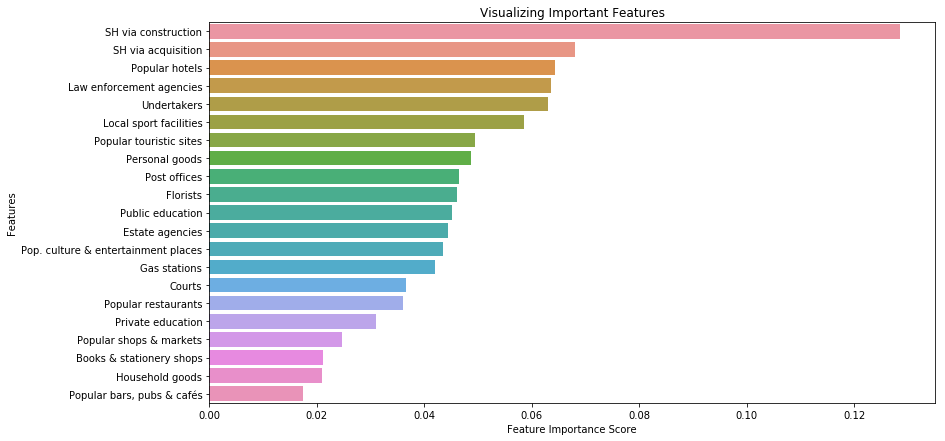

In [250]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(13, 7))

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.savefig('21features_RF_importance.png', bbox_inches='tight')

# Add labels 
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [26]:
SVM = svm.SVC(kernel='rbf').fit(X_train,y_train) 

yhatSVM = SVM.predict(X_test)
print('SVM Jaccard:',jaccard_similarity_score(y_test, yhatSVM))
print('SVM F1:',f1_score(y_test, yhatSVM, average='weighted',labels=np.unique(yhatSVM))) 

SVM Jaccard: 0.2
SVM F1: 0.33333333333333337


In [27]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)

#LogRegr

yhatLR = LR.predict(X_test)
print('LogRegr Jaccard:',jaccard_similarity_score(y_test, yhatLR))
print("LogRegr F1:",f1_score(y_test, yhatLR, average='weighted'))

LogRegr Jaccard: 0.4
LogRegr F1: 0.33928571428571425


In [28]:
#LogRegr prob

yhatPROB = LR.predict_proba(X_test)
print('Probability:', log_loss(y_test, yhatPROB))

Probability: 1.0432260572682155


#### 23 features: Social housing & education offering with split modalities

In [270]:
# Features selection

X1 = paris_data[[
 'Popular hotels',
 'Popular touristic sites',   
 'Pop. culture & entertainment places',
 'Popular shops & markets',
 'Personal goods',
 'Household goods',
 'Popular restaurants',
 'Courts',
 'Florists',         
 'Books & stationery shops',
 'Law enforcement agencies',
 'Popular bars, pubs & cafés',
 'Higher education',
 'Post offices',
 'Primary education',
 'Secondary education',
 'Estate agencies',
 'Local sport facilities',
 'Gas stations',
 'Undertakers',
 'SH for families',
 'SH for young adults',
 'SH for migrants']]

# Target setting  

y1 = paris_data['Price class'].values

In [271]:
# Create train & test sets

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.5, random_state=5)

In [272]:
# Data normalization

X1 = preprocessing.StandardScaler().fit(X1).transform(X1)

In [273]:
# Define labels

features1 = [
'Popular hotels',
 'Popular touristic sites',   
 'Pop. culture & entertainment places',
 'Popular shops & markets',
 'Personal goods',
 'Household goods',
 'Popular restaurants',
 'Courts',
 'Florists',         
 'Books & stationery shops',
 'Law enforcement agencies',
 'Popular bars, pubs & cafés',
 'Higher education',
 'Post offices',
 'Primary education',
 'Secondary education',
 'Estate agencies',
 'Local sport facilities',
 'Gas stations',
 'Undertakers',
 'SH for families',
 'SH for young adults',
 'SH for migrants']

price = ['price < 9k','price 9k-10k','price 10k-11.5k','price > 11.5k']

In [291]:
DT1 = DecisionTreeClassifier(criterion="entropy", max_depth = 5).fit(X1_train,y1_train)

yhat1DT = DT1.predict(X1_test)
print('Decision Tree Jaccard:',jaccard_similarity_score(y1_test, yhat1DT))
print("Decision Tree F1:",f1_score(y1_test, yhat1DT, average='weighted',labels=np.unique(yhat1DT)))

Decision Tree Jaccard: 0.8
Decision Tree F1: 0.8


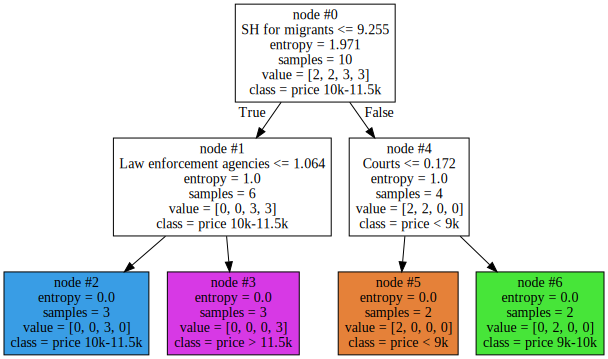

In [490]:
export_graphviz(DT1,
                feature_names=features1,
                out_file="DT1_paris.dot",
                class_names=price,
                filled=True,
                node_ids=True,
                special_characters=False,
                impurity=True,
                label='all')

with open("DT1_paris.dot") as paris_tree_image1:
    paris_tree_graph1 = paris_tree_image1.read()
graphviz.Source(paris_tree_graph1)

In [455]:
RF1 = RandomForestClassifier(n_estimators=200, random_state=200, criterion='entropy')

RF1.fit(X1_train, y1_train)
yhat1RF = RF1.predict(X1_test)

print("Random Forest Classifier accuracy score : ", accuracy_score(y1_test, yhat1RF))
print('---')
print("Random Forest Classifier confusion matrix :")
print(confusion_matrix(y1_test,yhat1RF))  
print('---')
print("Random Forest Classifier report :")
print(classification_report(y1_test, yhat1RF))

Random Forest Classifier accuracy score :  0.6
---
Random Forest Classifier confusion matrix :
[[3 0 0 0]
 [2 1 0 1]
 [0 0 1 0]
 [0 0 1 1]]
---
Random Forest Classifier report :
              precision    recall  f1-score   support

           0       0.60      1.00      0.75         3
           1       1.00      0.25      0.40         4
           2       0.50      1.00      0.67         1
           3       0.50      0.50      0.50         2

   micro avg       0.60      0.60      0.60        10
   macro avg       0.65      0.69      0.58        10
weighted avg       0.73      0.60      0.55        10



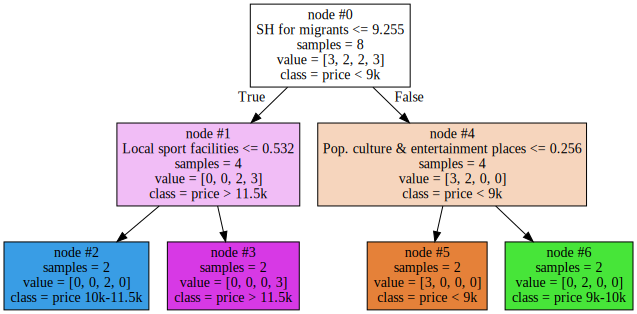

In [311]:
estimator1 = RF1.estimators_[2]

export_graphviz(estimator1,
                feature_names=features1,
                out_file="RF1_paris.dot",
                class_names=price,
                filled=True,
                node_ids=True,
                special_characters=False,
                impurity=False,
                label='all',
                leaves_parallel=False)

with open("RF1_paris.dot") as parisRF1_tree_image:
    parisRF1_tree_graph = parisRF1_tree_image.read()
graphviz.Source(parisRF1_tree_graph)

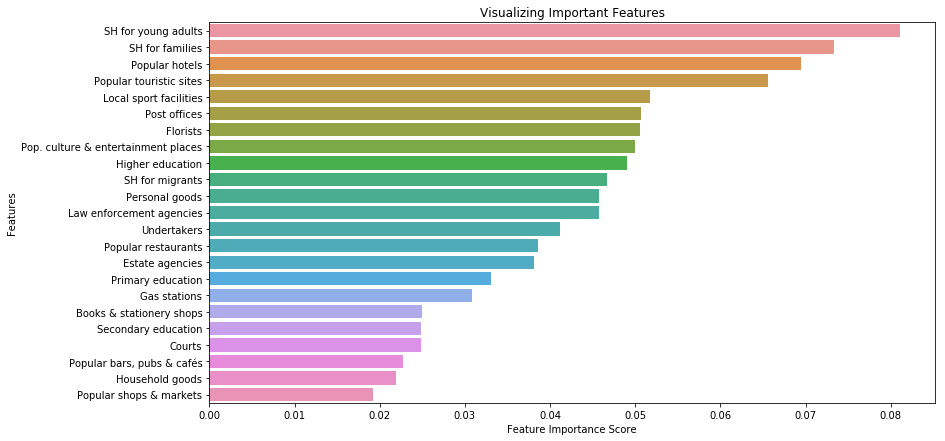

In [456]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(13, 7))

# Creating a bar plot
sns.barplot(x=feature1_imp, y=feature1_imp.index)

plt.savefig('23features_RF_importance.png', bbox_inches='tight')

# Add labels 
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [314]:
from sklearn.neighbors import KNeighborsClassifier

Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh_train1 = KNeighborsClassifier(n_neighbors = n).fit(X1_train,y1_train)
    yhat1=neigh_train1.predict(X1_test)
    mean_acc[n-1] = metrics.accuracy_score(y1_test, yhat1)

    std_acc[n-1]=np.std(yhat1==y1_test)/np.sqrt(yhat1.shape[0])

mean_acc

print("The best accuracy is with", mean_acc.max(), "with k =", mean_acc.argmax()+1) 

The best accuracy is with 0.5 with k = 4


In [315]:
neigh1 = KNeighborsClassifier(n_neighbors = 4).fit(X1_train,y1_train)
yhat1_knn = neigh1.predict(X1_test)
print('KNN Jaccard:', jaccard_similarity_score(y1_test, yhat1_knn))
print("KNN F1:", f1_score(y1_test, yhat1_knn, average='weighted',labels=np.unique(yhat1_knn))) 

KNN Jaccard: 0.5
KNN F1: 0.4866666666666667


In [316]:
SVM1 = svm.SVC(kernel='rbf').fit(X1_train,y1_train) 

yhat1SVM = SVM1.predict(X1_test)
print('SVM Jaccard:',jaccard_similarity_score(y1_test, yhat1SVM))
print('SVM F1:',f1_score(y1_test, yhat1SVM, average='weighted',labels=np.unique(yhat1SVM))) 

SVM Jaccard: 0.1
SVM F1: 0.1212121212121212


In [317]:
LR1 = LogisticRegression(C=0.01, solver='liblinear').fit(X1_train,y1_train)

#LogRegr

yhat1LR = LR1.predict(X1_test)
print('LogRegr Jaccard:',jaccard_similarity_score(y1_test, yhat1LR))
print("LogRegr F1:",f1_score(y1_test, yhat1LR, average='weighted'))

LogRegr Jaccard: 0.5
LogRegr F1: 0.488095238095238


In [318]:
#LogRegr prob

yhat1PROB = LR1.predict_proba(X1_test)
print('Probability:', log_loss(y1_test, yhat1PROB))

Probability: 1.7420106178076196


### 46 features

In [408]:
# Features selection (education and social housing = beneficiaries)

X2 = paris_data[[
 'Population',
 'Law enforcement agencies',
 'Courts',
 'Tax offices',
 'Employment agencies',
 'Banks',
 'Automotive services',
 'Building crafts',
 'Personal care services',
 'Estate agencies',
 'Restaurants',
 'Post offices',
 'Veterinaries',
 'Laundries',
 'Undertakers',
 'Supermarkets',
 'Convenience stores',
 'Food shops',
 'Personal goods',
 'Household goods',
 'Books & stationery shops',
 'Florists',
 'Gas stations',
 'Popular hotels',
 'Popular bars, pubs & cafés',
 'Popular beauty care places',
 'Pop. culture & entertainment places',
 'Popular easy food places',
 'Popular nightclubs',
 'Popular restaurants',
 'Popular shops & markets',
 'Popular touristic sites',
 'Popular sport activity places',
 'Collective daycares',
 'Community centres',
 'Local sport facilities',
 'Squares & gardens',
 'Rail stations',
 'Primary education',
 'Secondary education',
 'Higher education',
 'SH for dependent persons',
 'SH for families',
 'SH for migrants',
 'SH for poor people',
 'SH for young adults']]

# Target setting  

y2 = paris_data['Price class'].values

In [409]:
# Create train & test sets

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.5, random_state=5)

In [410]:
# Data normalization

X2 = preprocessing.StandardScaler().fit(X2).transform(X2)

In [411]:
# Define labels

features2 = [
'Population',
 'Law enforcement agencies',
 'Courts',
 'Tax offices',
 'Employment agencies',
 'Banks',
 'Automotive services',
 'Building crafts',
 'Personal care services',
 'Estate agencies',
 'Restaurants',
 'Post offices',
 'Veterinaries',
 'Laundries',
 'Undertakers',
 'Supermarkets',
 'Convenience stores',
 'Food shops',
 'Personal goods',
 'Household goods',
 'Books & stationery shops',
 'Florists',
 'Gas stations',
 'Popular hotels',
 'Popular bars, pubs & cafés',
 'Popular beauty care places',
 'Pop. culture & entertainment places',
 'Popular easy food places',
 'Popular nightclubs',
 'Popular restaurants',
 'Popular shops & markets',
 'Popular touristic sites',
 'Popular sport activity places',
 'Collective daycares',
 'Community centres',
 'Local sport facilities',
 'Squares & gardens',
 'Rail stations',
 'Primary education',
 'Secondary education',
 'Higher education',
 'SH for dependent persons',
 'SH for families',
 'SH for migrants',
 'SH for poor people',
 'SH for young adults']

price = ['price < 9k','price 9k-10k','price 10k-11.5k','price > 11.5k']

In [406]:
DT2 = DecisionTreeClassifier(criterion="entropy", max_depth = 5).fit(X2_train,y2_train)

yhat2DT = DT2.predict(X2_test)
print('Decision Tree Jaccard:',jaccard_similarity_score(y2_test, yhat2DT))
print("Decision Tree F1:",f1_score(y2_test, yhat2DT, average='weighted',labels=np.unique(yhat2DT)))

Decision Tree Jaccard: 0.8
Decision Tree F1: 0.8


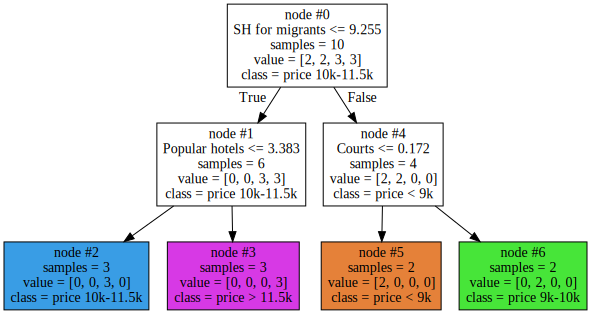

In [407]:
export_graphviz(DT2,
                feature_names=features2,
                out_file="DT2_paris.dot",
                class_names=price,
                filled=True,
                node_ids=True,
                special_characters=False,
                impurity=False,
                label='all')

with open("DT2_paris.dot") as paris_tree_image2:
    paris_tree_graph2 = paris_tree_image2.read()
graphviz.Source(paris_tree_graph2)

In [412]:
RF2 = RandomForestClassifier(n_estimators=200, random_state=200, criterion='entropy')

RF2.fit(X2_train, y2_train)
yhat2RF = RF2.predict(X2_test)

print("Random Forest Classifier accuracy score : ", accuracy_score(y2_test, yhat2RF))
print('---')
print("Random Forest Classifier confusion matrix :")
print(confusion_matrix(y2_test,yhat2RF))  
print('---')
print("Random Forest Classifier report :")
print(classification_report(y2_test, yhat2RF))

Random Forest Classifier accuracy score :  0.7
---
Random Forest Classifier confusion matrix :
[[3 0 0 0]
 [2 2 0 0]
 [0 0 1 0]
 [0 0 1 1]]
---
Random Forest Classifier report :
              precision    recall  f1-score   support

           0       0.60      1.00      0.75         3
           1       1.00      0.50      0.67         4
           2       0.50      1.00      0.67         1
           3       1.00      0.50      0.67         2

   micro avg       0.70      0.70      0.70        10
   macro avg       0.78      0.75      0.69        10
weighted avg       0.83      0.70      0.69        10



In [446]:
feature2_imp = pd.Series(RF2.feature_importances_, index=[
 'Population',
 'Law enforcement agencies',
 'Courts',
 'Tax offices',
 'Employment agencies',
 'Banks',
 'Automotive services',
 'Building crafts',
 'Personal care services',
 'Estate agencies',
 'Restaurants',
 'Post offices',
 'Veterinaries',
 'Laundries',
 'Undertakers',
 'Supermarkets',
 'Convenience stores',
 'Food shops',
 'Personal goods',
 'Household goods',
 'Books & stationery shops',
 'Florists',
 'Gas stations',
 'Popular hotels',
 'Popular bars, pubs & cafés',
 'Popular beauty care places',
 'Pop. culture & entertainment places',
 'Popular easy food places',
 'Popular nightclubs',
 'Popular restaurants',
 'Popular shops & markets',
 'Popular touristic sites',
 'Popular sport activity places',
 'Collective daycares',
 'Community centres',
 'Local sport facilities',
 'Squares & gardens',
 'Rail stations',
 'Primary education',
 'Secondary education',
 'Higher education',
 'SH for dependent persons',
 'SH for families',
 'SH for migrants',
 'SH for poor people',
 'SH for young adults']).sort_values(ascending=False)

feature2_imp

SH for migrants                        0.051924
Pop. culture & entertainment places    0.044123
Undertakers                            0.043976
Veterinaries                           0.041501
Popular hotels                         0.039192
Popular touristic sites                0.039092
Popular shops & markets                0.035453
Law enforcement agencies               0.034973
Post offices                           0.034844
Gas stations                           0.034417
Florists                               0.031134
SH for dependent persons               0.031071
Local sport facilities                 0.029021
Estate agencies                        0.028629
SH for poor people                     0.027396
SH for young adults                    0.025507
Personal goods                         0.023715
Primary education                      0.022837
Banks                                  0.022607
Higher education                       0.022237
Popular restaurants                    0

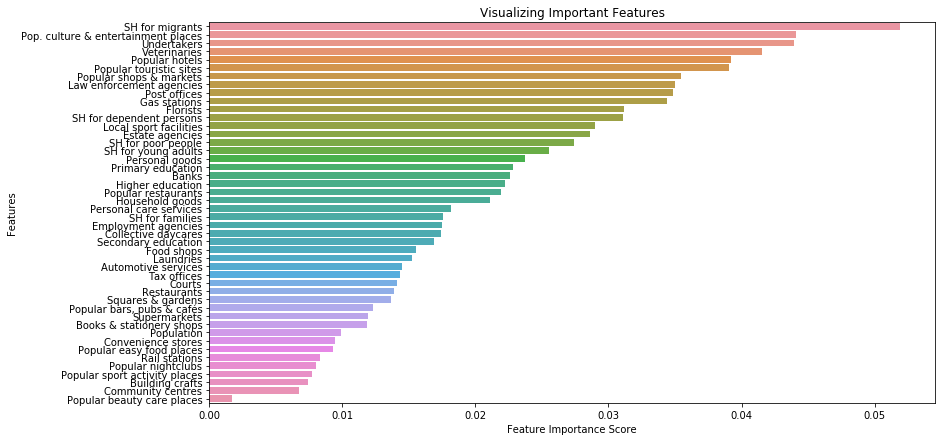

In [462]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(13, 7))

# Creating a bar plot
sns.barplot(x=feature2_imp, y=feature2_imp.index)

plt.savefig('46features_RF_importance.png', bbox_inches='tight')

# Add labels 
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [448]:
from sklearn import svm

SVM2 = svm.SVC(kernel='rbf').fit(X2_train,y2_train) 

yhat2SVM = SVM2.predict(X2_test)
print('SVM Jaccard:',jaccard_similarity_score(y2_test, yhat2SVM))
print('SVM F1:',f1_score(y2_test, yhat2SVM, average='weighted',labels=np.unique(yhat2SVM))) 

SVM Jaccard: 0.2
SVM F1: 0.33333333333333337


In [449]:
from sklearn.linear_model import LogisticRegression

LR2 = LogisticRegression(C=0.01, solver='liblinear').fit(X2_train,y2_train)

#LogRegr

yhat2LR = LR2.predict(X2_test)
print('LogRegr Jaccard:',jaccard_similarity_score(y2_test, yhat2LR))
print("LogRegr F1:",f1_score(y2_test, yhat2LR, average='weighted'))

LogRegr Jaccard: 0.5
LogRegr F1: 0.39833333333333326


In [450]:
#LogRegr prob

yhat2PROB = LR2.predict_proba(X2_test)
print('Probability:', log_loss(y2_test, yhat2PROB))

Probability: 4.9753665122129505
